In [76]:
import sys
import os
import getopt
import networkx as nx
import operator
import csv
import glob
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import seaborn as sns

#name lists to be recycled throughout analysis.#

class_list_head_neurons = (
    'ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY', 'AIZ',
    'ALA', 'ALM', 'ALN', 'AQR', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'ASn',
    'AUA', 'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVG', 'AVH', 'AVJ', 'AVK', 'AVL',
    'AVM', 'AWA', 'AWB', 'AWC', 'BAG', 'BDU', 'CEP', 'DAn', 'DBn', 'DDn', 'DVA', 'DVC', 'FLP', 'HSN', 'IL1', 'IL2', 'OLL', 'OLQ', 'PDE', 'PLN', 'PQR', 'PVC', 'PVD', 'PVM',
    'PVN', 'PVP', 'PVQ', 'PVR', 'PVT', 'RIA', 'RIB', 'RIC', 'RID', 'RIF',
    'RIG', 'RIH', 'RIM', 'RIP', 'RIR', 'RIS', 'RIV', 'RMD', 'RME', 'RMF', 'RMG',
    'RMH', 'SAA', 'SAB', 'SDQ', 'SIA', 'SIB', 'SMB', 'SMD', 'URA', 'URB', 'URX',
    'URY', 'VAn', 'VBn', 'VCn', 'VDn',
    'BWM01', 'BWM02', 'BWM03', 'BWM04', 'BWM05', 'BWM06', 'BWM07', 'BWM08',
    'CAN', 'CEPsh', 'GLR', 'excgl', 'hyp')


class_list = (
    'ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY', 'AIZ',
    'ALA', 'ALM', 'ALN', 'AQR', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'ASn',
    'AUA', 'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVG', 'AVH', 'AVJ', 'AVK', 'AVL',
    'AVM', 'AWA', 'AWB', 'AWC', 'BAG', 'BDU', 'CEP', 'DAn', 'DBn', 'DDn', 'DVA',
    'DVB', 'DVC', 'FLP', 'HSN', 'IL1', 'IL2', 'LUA', 'OLL', 'OLQ', 'PDA',
    'PDB', 'PDE', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PQR', 'PVC', 'PVD', 'PVM',
    'PVN', 'PVP', 'PVQ', 'PVR', 'PVT', 'PVW', 'RIA', 'RIB', 'RIC', 'RID', 'RIF',
    'RIG', 'RIH', 'RIM', 'RIP', 'RIR', 'RIS', 'RIV', 'RMD', 'RME', 'RMF', 'RMG',
    'RMH', 'SAA', 'SAB', 'SDQ', 'SIA', 'SIB', 'SMB', 'SMD', 'URA', 'URB', 'URX',
    'URY', 'VAn', 'VBn', 'VCn', 'VDn',
    'BWM01', 'BWM02', 'BWM03', 'BWM04', 'BWM05', 'BWM06', 'BWM07', 'BWM08',
    'CAN', 'CEPsh', 'GLR', 'excgl', 'hyp')


def nclass(n):
    if n in (
        'AVG', 'DVC', 'PVR', 'PVT', 'RIH', 'RIR', 'DVA', 'AQR', 'AVM', 'PQR',
        'PVM', 'DVB', 'PDA', 'PDB', 'ALA', 'AVL', 'RID', 'RIS',
        'I3', 'I4', 'I5', 'I5', 'M1', 'M4', 'M5', 'MI',
    ):
        return n
    if len(n) == 4 and n[-1] in 'LR' and n[:3] in (
        'ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY',
        'AIZ', 'ALM', 'ALN', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'AUA',
        'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVJ', 'AVK', 'AWA', 'AWB',
        'AWC', 'BAG', 'BDU', 'CAN', 'FLP', 'GLR', 'HSN', 'IL1', 'IL2', 'LUA',
        'OLL', 'PDE', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PVC', 'PVD', 'PVN',
        'PVP', 'PVQ', 'PVW', 'RIA', 'RIB', 'RIC', 'RIF', 'RIG', 'RIM', 'RIP',
        'RIV', 'RMD', 'RMF', 'RMG', 'RMH', 'SDQ', 'URB', 'URX'
    ):
        return n[:3]
    if len(n) == 5 and n[-2:] in ('DL', 'DR', 'VL', 'VR') and n[:3] in (
        'CEP', 'GLR', 'IL1', 'IL2', 'OLQ', 'RMD', 'SAA', 'SIA', 'SIB', 'SMB',
        'SMD', 'URA', 'URY'
    ):
        return n[:3]
    if len(n) == 8 and re.match('BWM-[DV][LR]0[0-8]', n):
        return 'BWM' + n[-2:]
    if n in (
        'RMED', 'RMEL', 'RMER', 'RMEV', 'SABD', 'SABVL', 'SABVR', 'SIBD', 'SIBV'
    ):
        return n[:3]
    if n in (
        'CEPshDL', 'CEPshDR', 'CEPshVL', 'CEPshVR'
    ):
        return n[:5]
    if n[:2] in ('AS', 'VB', 'VA', 'VD') and n[2:] in map(str, range(12)):
        return n[:2] + 'n'
    if n in ('VA12', 'VD12', 'VD13'):
        return n[:2] + 'n'
    if re.match('^(DA[1-9])|(DB[1-7])|(DD[1-6])|(VC[1-6])$', n):
        return n[:2] + 'n'
    return n



def nclass2(n):
    if n in (
        'AVG', 'DVC', 'PVR', 'PVT', 'RIH', 'RIR', 'DVA', 'AQR', 'AVM', 'PQR',
        'PVM', 'DVB', 'PDA', 'PDB', 'ALA', 'AVL', 'RID', 'RIS',
        'I3', 'I4', 'I5', 'I5', 'M1', 'M4', 'M5', 'MI',
    ):
        return n
    if len(n) == 4 and n[-1] in 'LR' and n[:3] in (
        'ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY',
        'AIZ', 'ALM', 'ALN', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'AUA',
        'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVJ', 'AVK', 'AWA', 'AWB',
        'AWC', 'BAG', 'BDU', 'CAN', 'FLP', 'GLR', 'HSN', 'IL1', 'IL2', 'LUA',
        'OLL', 'PDE', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PVC', 'PVD', 'PVN',
        'PVP', 'PVQ', 'PVW', 'RIA', 'RIB', 'RIC', 'RIF', 'RIG', 'RIM', 'RIP',
        'RIV', 'RMD', 'RMF', 'RMG', 'RMH', 'SDQ', 'URB', 'URX'
    ):
        return n[:3]
    if len(n) == 5 and n[-2:] in ('DL', 'DR', 'VL', 'VR') and n[:3] in (
        'CEP', 'GLR', 'IL1', 'IL2', 'OLQ', 'RMD', 'SAA', 'SIA', 'SIB', 'SMB',
        'SMD', 'URA', 'URY'
    ):
        return n[:3]
    if len(n) == 4 and n[-1:] in ('DV') and n[:3] in (
        'CEP', 'GLR', 'IL1', 'IL2', 'OLQ', 'RMD', 'SAA', 'SIA', 'SIB', 'SMB',
        'SMD', 'URA', 'URY'
    ):
        return n[:3]
    if len(n) == 8 and re.match('BWM-[DV][LR]0[0-8]', n):
        return 'BWM' + n[-2:]
    if n in (
        'RMED', 'RMEL', 'RMER', 'RMEV', 'SABD', 'SABVL', 'SABVR', 'SIBD', 'SIBV'
    ):
        return n[:3]
    if n in (
        'CEPshDL', 'CEPshDR', 'CEPshVL', 'CEPshVR'
    ):
        return n[:5]
    if n[:2] in ('VB', 'VA', 'VC', 'VD'):
        return n[:2] + 'n'
    if n[:3] in ('VB0'):
        return 'VBn'
    if n in ('VA12', 'VD12', 'VD13'):
        return n[:2] + 'n'
    if n[:2] in ('AS', 'VB', 'VA', 'VC', 'VD') and n[2:] in map(str, range(12)):
        return n[:2] + 'n'
    if n in ('VA12', 'VD12', 'VD13'):
        return n[:2] + 'n'
    if re.match('^(DA[1-9])|(DB[1-7])|(DD[1-6])|(VC[1-6])$', n):
        return n[:2] + 'n'
    if n[:3] in ('BWM'):
        return 'BWM'
    return n

def brittin_layers(n):
  #requires passing nclass first
  if n in ('CEPV', 'URY', 'URA', 'URA', 'RME', 'RIP', 'OLQ', 'IL2', 'IL1',
           'URY', 'IL1', 'RMDD', 'RMDV', 'OLL', 'RIH', 'AVE', 'RIA'
  ):
    return 'Anterior'
  if n in ('FLP', 'ADA', 'ASH', 'RIF', 'PVP', 'PVC', 'BDU', 'AVM', 'AVJ', 'AVH', 'AVD', 'AVB', 'ALM', 'AQR'
  ):
    return 'Avoidance'
  if n in ('DVC', 'RIG', 'RIS', 'SMD', 'RIV', 'SAA', 'PVT', 'AVK', 'AVL', 'RMF', 'RIM'
  ):
    return 'Lateral'
  if n in ('RMG', 'CEPD', 'URB', 'DVA', 'SMB', 'SIA', 'SIBV', 'SIBD', 'RIC', 'SDQ', 'RMH'
  ):
    return 'Sublateral'
  if n in ('BAG', 'RIB', 'ASI', 'AWC', 'AIN', 'AUA', 'AFD', 'AIY', 'ADL', 'AWB', 'ASE', 'AWA', 'ADF', 'AIZ', 'AIB', 'AIA', 'ASG', 'ASK', 'AVF', 'PVQ', 'ASJ', 'AIM', 'ALA'
  ):
    return 'Taxis'
  if n in ('RMD', 'URX', 'ALN', 'ADE', 'AVA', 'RIR', 'RID', 'HSN', 'PVR', 'PVN', 'PLN'
  ):
    return 'Unclassified'
  else:
    return 'non-ganglia'


def moyle_layers(n):
  if n in ('CEPV', 'CEPD', 'IL1', 'IL2', 'OLL', 'OLQ', 'RIA', 'RIH', 'RIP', 'RMDV', 'RMDD', 'RME', 'URA', 'URB', 'URY'
  ):
    return 'Stratum1'
  if n in ('ADE', 'ALN', 'AVK', 'AVL', 'DVC', 'PLN', 'PVT', 'RIC', 'RIV', 'RMD', 'RMF', 'RMH', 'SAA', 'SIA', 'SIBD', 'SMB', 'SMD'
  ):
    return 'Stratum2'
  if n in ('ADA', 'ADL', 'AIM', 'ALA', 'ALM', 'AQR', 'ASH', 'ASJ', 'ASK', 'AVB', 'AVD', 'AVF', 'AVH', 'AVJ', 'AVM', 'BDU', 'DVA', 'HSN', 'PVC', 'PVN', 'PVP', 'PVQ', 'RID', 'RIF'
  ):
    return 'Stratum3'
  if n in ('ADF', 'AFD', 'AIA', 'AIN', 'AIY', 'ASE', 'ASG', 'ASI', 'AUA', 'AWB', 'AWC', 'BAG'
  ):
    return 'Stratum4'
  if n in ('AIB', 'AIZ', 'AVA', 'AVE', 'AWA', 'FLP', 'PVR', 'RIB', 'RIG', 'RIM', 'RIR', 'RIS', 'RMG', 'SDQ', 'SIBV', 'URX', 'VB0'
  ):
    return 'Unassigned'
  else:
    return 'non-ganglia'


def ganglia(n):
  if n in ('BAGR', 'CEPVL', 'CEPVR', 'IL1DL', 'IL1DR', 'IL1L',
    'IL1R', 'IL1VL', 'IL1VR','IL2DL', 'IL2DR','IL2L', 'IL2R', 'IL2VL',
    'IL2VR','OLLL', 'OLLR', 'OLQDL', 'OLQDR','OLQVL', 'OLQVR','RIPL',
    'RIPR', 'RMED', 'RMEL', 'RMER', 'RMEV', 'URADL', 'URADR','URAVL',
    'URAVR','URBL', 'URBR', 'URYDL', 'URYDR','URYVL', 'URYVR','AVL', 'PVR', 'BAGL'
  ):
    return 'Anterior'
  if n in ('ALA', 'CEPD', 'CEPD', 'RID', 'URXL'
  ):
    return 'Dorsal'
  if n in ('DVA', 'DVB', 'DVC'
  ):
    return 'DRG'
  if n in ('ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL', 'AFDR', 'AIBL', 'AIBR', 'AINL', 'AINR', 'AIZL', 'AIZR', 'ASEL', 'ASER', 'ASGL',
           'ASGR', 'ASHL', 'ASHR', 'ASIL', 'ASIR', 'ASJL', 'ASJR', 'ASKL', 'ASKR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVBL', 'AVBR',
           'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVHL', 'AVHR', 'AVJL', 'AVJR', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'RIAL',
           'RIAR', 'RIBL', 'RIBR', 'RICL', 'RICR', 'RIML', 'RIMR', 'RIVL', 'RIVR', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'SAAVL', 'SAAVR',
           'SIBDL', 'SIBDR', 'SMDVL', 'SMDVR'
  ):
    return 'Lateral'
  if n in ('ALNL', 'ALNR', 'LUAL', 'LUAR', 'PHAL', 'PHAR', 'PHBL', 'PHBR', 'PHCL', 'PHCR', 'PLML', 'PLMR', 'PLNL', 'PLNR', 'PQR', 'PVCL',
           'PVCR', 'PVNL', 'PVNR', 'PVQL', 'PVQR', 'PVWL', 'PVWR'
  ):
    return 'LG'
  if n in ('AS11', 'DA08', 'DA09', 'DD06', 'PDA', 'PDB', 'PVPL', 'PVPR', 'PVT', 'VA12', 'VD12', 'VD13'
  ):
    return 'PAG'
  if n in ('ALML', 'ALMR', 'AVM', 'BDUL', 'BDUR', 'HSNL', 'HSNR', 'PDEL', 'PDER', 'PVDL', 'PVDR', 'PVM', 'SDQL', 'SDQR'
  ):
    return 'PLG'
  if n in ('ADAL', 'ADAR', 'ADEL', 'ADER', 'AQR', 'AS01', 'AVFL', 'AVFR', 'AVG', 'DA01', 'DB01', 'DB02', 'DD01', 'FLPL', 'FLPR',
           'RIFL', 'RIFR', 'RIGL', 'RIGR', 'RMGL', 'RMGR', 'SABD', 'SABVL', 'SABVR', 'VA01', 'VB01', 'VB02', 'VD01', 'VD02'
  ):
    return 'RVG'
  if n in ('AIAL', 'AIAR', 'AIML', 'AIMR', 'AIYL', 'AIYR', 'AVKL', 'AVKR', 'RIH', 'RIR', 'RIS', 'RMDDL', 'RMDDR', 'RMFL', 'RMFR',
           'RMHL', 'RMHR', 'SAADL', 'SAADR', 'SIADL', 'SIADR', 'SIAVL', 'SIAVR', 'SIBVL', 'SIBVR', 'SMBDL', 'SMBDR', 'SMBVL', 'SMBVR', 'SMDDL', 'SMDDR'
  ):
    return 'Ventral'
  if n in ('AS10', 'AS02', 'AS03', 'AS04', 'AS05', 'AS06', 'AS07', 'AS08', 'AS09', 'DA02', 'DA03', 'DA04', 'DA05', 'DA06', 'DA07', 'DB03', 'DB04', 'DB05',
           'DB06', 'DB07', 'DD02', 'DD03', 'DD04', 'DD05', 'VA10', 'VA11', 'VA02', 'VA03', 'VA04', 'VA05', 'VA06', 'VA07', 'VA08', 'VA09', 'VB10',
           'VB11', 'VB03', 'VB04', 'VB05', 'VB06', 'VB07', 'VB08', 'VB09', 'VC01', 'VC02', 'VC03', 'VC04', 'VC05', 'VD10', 'VD11', 'VD03', 'VD04', 'VD05',
           'VD06', 'VD07', 'VD08', 'VD09'
  ):
    return 'VNC'
  else:
    return 'non-ganglia'

unc42 = ["AIBL", "AIBR", "ASHL", "ASHR", "AVAL", "AVAR", "AVBL", "AVBR", "AVDL", "AVDR", "AVEL", "AVER",
	"AVHL", "AVHR", "AVKL", "AVKR", "RIVL", "RIVR", "RMDL", "RMDR", "RMDDL", "RMDDR", "RMDVL", "RMDVR", "RMFL", "RMFR", "RMHL", "RMHR", "SAAVL",
	"SAAVR", "SAADL", "SAADR", "SIBVL", "SIBVR", "SIBDL", "SIBDR", "SMDDL", "SMDDR", "SMDVL", "SMDVR"]

#post-embryonic neurons
post_embryonic = ["AQR","ASn","AVF","AVM","DVB","PDA","PDB", "PDE", "PHC","PLN","PQR","PVD","PVM","PVN","PVW","RMF","RMH","SDQ","VAn",
  "VBn","VCn","VDn"]

known_differences = ['ADE', 'ALM', 'AQR', 'ASE', 'ASJ', 'AVH', 'AVM', 'CAN', 'GLR', 'IL1', 'IL1', 'M4',
                     'M5', 'NSM', 'OLQ', 'PVN', 'RIP', 'RIS', 'RMF', 'URB', 'PVD', 'VC1', 'VC6']



def in_brain(n):
    print(len(set(class_list) - set(n)), 'differences between two tuples')
    in_brain_differences =  set(class_list) - set(n)
    print(set(n).issubset(class_list), '...tuple is contained within class_list')


###make a list of NR-present neurons###

def class_members(cls):
    if cls in (
        'AVG', 'DVC', 'PVR', 'PVT', 'RIH', 'RIR', 'DVA', 'AQR', 'AVM', 'PQR',
        'PVM', 'DVB', 'PDA', 'PDB', 'ALA', 'AVL', 'RID', 'RIS',
        'I3', 'I4', 'I5', 'I5', 'M1', 'M4', 'M5', 'MI', 'SABD'
    ):
        return [cls]
    if cls in (
        'ADA', 'AIA', 'AIB', 'AIN', 'AIY', 'AIZ', 'BDU', 'LUA', 'PVN', 'PVP',
        'PVW', 'RIA', 'RIB', 'RIF', 'RIG', 'RIM', 'RIP', 'AVA', 'AVD', 'AVE',
        'AVB', 'PVC', 'ADL', 'AFD', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK',
        'AUA', 'AWA', 'AWB', 'AWC', 'BAG', 'FLP', 'OLL', 'URB', 'RMG', 'PDE',
        'ALM', 'ALN', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PVD', 'SDQ', 'RIV',
        'RMF', 'RMH', 'AIM', 'AVF', 'AVH', 'AVJ', 'AVK', 'PVQ', 'RIC', 'ADE',
        'ADF', 'HSN', 'URX',
        'I1', 'I2', 'M2', 'M3', 'MC', 'NSM',
        'CAN',
        'SAAD', 'SAAV', 'URYD', 'URYV', 'SMBD', 'SMBV', 'SMDD', 'SMDV', 'URAD',
        'URAV', 'SIBD', 'SIBV', 'SIAD', 'SIAV', 'CEPD', 'CEPV', 'OLQD', 'OLQV',
        'IL1D', 'IL1V', 'IL2D', 'IL2V', 'RMDD', 'RMDV', 'GLRD', 'GLRV', 'CEPshD',
        'CEPshV', 'SABV'
    ):
        return [cls + n for n in ('L', 'R')]
    if cls in (
        'SAA', 'URY', 'SMB', 'SMD', 'URA', 'SIB', 'SIA', 'CEP', 'OLQ', 'CEPsh'
    ):
        return [cls + n for n in ('DL', 'DR', 'VL', 'VR')]
    if cls in ('IL1', 'IL2', 'RMD', 'GLR'):
        return [cls + n for n in ('DL', 'DR', 'L', 'R', 'VL', 'VR')]
    if cls in ('GLRL/R', 'RMDL/R', 'RMEL/R', 'IL1L/R', 'RMED/V', 'IL2L/R'):
        return [cls[:3] + cls[3], cls[:3] + cls[5]]

    if cls == 'SAB':
        return ['SABD', 'SABVL', 'SABVR']
    if cls == 'RME':
        return ['RMED', 'RMEL', 'RMER', 'RMEV']
    if cls == 'DAn':
        return ['DA' + str(i + 1) for i in range(9)]
    if cls == 'DBn':
        return ['DB' + str(i + 1) for i in range(7)]
    if cls in ('DDn', 'VCn'):
        return [cls[:2] + str(i + 1) for i in range(6)]
    if cls == 'VAn':
        return ['VA' + str(i + 1) for i in range(12)]
    if cls in ('VBn', 'ASn'):
        return [cls[:2] + str(i + 1) for i in range(11)]
    if cls == 'VDn':
        return ['VD' + str(i + 1) for i in range(13)]

    if cls == 'muscle':
        return ['muscle'] + \
           ['BWM-DL' + str(i + 1).zfill(2) for i in range(24)] + \
           ['BWM-DR' + str(i + 1).zfill(2) for i in range(24)] + \
           ['BWM-VL' + str(i + 1).zfill(2) for i in range(23)] + \
           ['BWM-VR' + str(i + 1).zfill(2) for i in range(24)]

    if cls in (
        'BWM01', 'BWM02', 'BWM03', 'BWM04', 'BWM05', 'BWM06', 'BWM07', 'BWM08',
    ):
        return ['BWM-' + n + cls[-2:] for n in ('DL', 'DR', 'VL', 'VR')]
    if cls in (
        'BWM01D', 'BWM02D', 'BWM03D', 'BWM04D', 'BWM05D', 'BWM06D', 'BWM07D', 'BWM08D',
        'BWM01V', 'BWM02V', 'BWM03V', 'BWM04V', 'BWM05V', 'BWM06V', 'BWM07V', 'BWM08V',
    ):
        return ['BWM-' + cls[-1] + n + cls[-3:-1] for n in ('L', 'R')]

    return [cls]


def ntype(n):
    n = nclass(n)
    if n not in class_list:
        n = nclass(class_members(n)[0])

    if n in (
        'ADF', 'ADL', 'AFD', 'ALM', 'ALN', 'AQR', 'ASE', 'ASG', 'ASH', 'ASI',
        'ASJ', 'ASK', 'AUA', 'AVM', 'AWA', 'AWB', 'AWC', 'BAG', 'DVA', 'FLP',
        'IL2', 'OLL', 'OLQ', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PQR', 'PVD',
        'PVM', 'SAA', 'SDQ', 'URB', 'URX', 'URY'
    ):
        return 'sensory'
    if n in (
        'ADA', 'AIA', 'AIB', 'AIN', 'AIY', 'AIZ', 'AVA', 'AVB', 'AVD', 'AVE',
        'AVG', 'BDU', 'LUA', 'PVC', 'PVP', 'PVR', 'PVT', 'PVW',
        'RIA', 'RIB', 'RIF', 'RIG', 'RIH', 'RIM', 'RIR', 'RIP', 'AVJ',
    ):
        return 'inter'
    if n in (
        'ASn', 'DAn', 'DBn', 'DDn', 'DVB', 'IL1', 'PDA', 'PDB', 'RIV', 'RMD',
        'RME', 'RMF', 'RMH', 'SAB', 'SIA', 'SIB', 'SMB', 'SMD', 'URA', 'VAn',
        'VBn', 'VCn', 'VDn',
    ):
        return 'motor'
    if n in (
        'ADE', 'AIM', 'ALA', 'AVF', 'AVH', 'AVK', 'AVL', 'CEP', 'HSN',
        'PDE', 'PVQ', 'PVN', 'RIC', 'RID', 'RIS', 'RMG', 'DVC',
    ):
        return 'modulatory'
    if n in (
        'BWM01', 'BWM02', 'BWM03', 'BWM04', 'BWM05', 'BWM06', 'BWM07', 'BWM08', 'BWM'
    ):
        return 'muscle'
    if n in ('CAN', 'CEPsh', 'GLR', 'excgl', 'hyp'):
        return 'end_organ'

    return 'nonvalid'



def nclass2(n):
    if n in (
        'AVG', 'DVC', 'PVR', 'PVT', 'RIH', 'RIR', 'DVA', 'AQR', 'AVM', 'PQR',
        'PVM', 'DVB', 'PDA', 'PDB', 'ALA', 'AVL', 'RID', 'RIS',
        'I3', 'I4', 'I5', 'I5', 'M1', 'M4', 'M5', 'MI',
    ):
        return n
    if len(n) == 4 and n[-1] in 'LR' and n[:3] in (
        'ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY',
        'AIZ', 'ALM', 'ALN', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'AUA',
        'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVJ', 'AVK', 'AWA', 'AWB',
        'AWC', 'BAG', 'BDU', 'CAN', 'FLP', 'GLR', 'HSN', 'IL1', 'IL2', 'LUA',
        'OLL', 'PDE', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PVC', 'PVD', 'PVN',
        'PVP', 'PVQ', 'PVW', 'RIA', 'RIB', 'RIC', 'RIF', 'RIG', 'RIM', 'RIP',
        'RIV', 'RMD', 'RMF', 'RMG', 'RMH', 'SDQ', 'URB', 'URX'
    ):
        return n[:3]
    if len(n) == 5 and n[-2:] in ('DL', 'DR', 'VL', 'VR') and n[:3] in (
        'CEP', 'GLR', 'IL1', 'IL2', 'OLQ', 'RMD', 'SAA', 'SIA', 'SIB', 'SMB',
        'SMD', 'URA', 'URY'
    ):
        return n[:3]
    if len(n) == 4 and n[-1:] in ('DV') and n[:3] in (
        'CEP', 'GLR', 'IL1', 'IL2', 'OLQ', 'RMD', 'SAA', 'SIA', 'SIB', 'SMB',
        'SMD', 'URA', 'URY'
    ):
        return n[:3]
    if len(n) == 8 and re.match('BWM-[DV][LR]0[0-8]', n):
        return 'BWM' + n[-2:]
    if n in (
        'RMED', 'RMEL', 'RMER', 'RMEV', 'SABD', 'SABVL', 'SABVR', 'SIBD', 'SIBV'
    ):
        return n[:3]
    if n in (
        'CEPshDL', 'CEPshDR', 'CEPshVL', 'CEPshVR'
    ):
        return n[:5]
    if n[:2] in ('VB', 'VA', 'VC', 'VD'):
        return n[:2] + 'n'
    if n[:3] in ('VB0'):
        return 'VBn'
    if n in ('VA12', 'VD12', 'VD13'):
        return n[:2] + 'n'
    if n[:2] in ('AS', 'VB', 'VA', 'VC', 'VD') and n[2:] in map(str, range(12)):
        return n[:2] + 'n'
    if n in ('VA12', 'VD12', 'VD13'):
        return n[:2] + 'n'
    if re.match('^(DA[1-9])|(DB[1-7])|(DD[1-6])|(VC[1-6])$', n):
        return n[:2] + 'n'
    if n[:3] in ('BWM'):
        return 'BWM'
    return n




def is_neuron(n):
    n = nclass(n)
    return n in class_list and ntype(n) not in ('muscle', 'other')


def nclass(n):
    if n in (
        'AVG', 'DVC', 'PVR', 'PVT', 'RIH', 'RIR', 'DVA', 'AQR', 'AVM', 'PQR',
        'PVM', 'DVB', 'PDA', 'PDB', 'ALA', 'AVL', 'RID', 'RIS',
        'I3', 'I4', 'I5', 'I5', 'M1', 'M4', 'M5', 'MI', 'BWM'
    ):
        return n
    if len(n) == 4 and n[-1] in 'LR' and n[:3] in (
        'ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY',
        'AIZ', 'ALM', 'ALN', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'AUA',
        'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVJ', 'AVK', 'AWA', 'AWB',
        'AWC', 'BAG', 'BDU', 'CAN', 'FLP', 'GLR', 'HSN', 'IL1', 'IL2', 'LUA',
        'OLL', 'PDE', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PVC', 'PVD', 'PVN',
        'PVP', 'PVQ', 'PVW', 'RIA', 'RIB', 'RIC', 'RIF', 'RIG', 'RIM', 'RIP',
        'RIV', 'RMD', 'RMF', 'RMG', 'RMH', 'SDQ', 'URB', 'URX'
    ):
        return n[:3]
    if len(n) == 5 and n[-2:] in ('DL', 'DR', 'VL', 'VR') and n[:3] in (
        'CEP', 'GLR', 'IL1', 'IL2', 'OLQ', 'RMD', 'SAA', 'SIA', 'SIB', 'SMB',
        'SMD', 'URA', 'URY'
    ):
        return n[:3]
    if len(n) == 8 and re.match('BWM-[DV][LR]0[0-8]', n):
        return 'BWM' + n[-2:]
    if n in (
        'RMED', 'RMEL', 'RMER', 'RMEV', 'SABD', 'SABVL', 'SABVR',
    ):
        return n[:3]
    if n in (
        'CEPshDL', 'CEPshDR', 'CEPshVL', 'CEPshVR'
    ):
        return n[:5]
    if n[:2] in ('AS', 'VB', 'VA', 'VD') and n[2:] in map(str, range(12)):
        return n[:2] + 'n'
    if n in ('VA12', 'VD12', 'VD13'):
        return n[:2] + 'n'
    if re.match('^(DA[1-9])|(DB[1-7])|(DD[1-6])|(VC[1-6])$', n):
        return n[:2] + 'n'
    if n[:3] in ('BWM'):
        return 'BWM'
    return n

def nclass_strata(n):
  #deals with CEP,RMD,SIB to give 4 letter clasifications as per Moyle, Brittin, and ganglia differences
    if n in (
        'AVG', 'DVC', 'PVR', 'PVT', 'RIH', 'RIR', 'DVA', 'AQR', 'AVM', 'PQR',
        'PVM', 'DVB', 'PDA', 'PDB', 'ALA', 'AVL', 'RID', 'RIS',
        'I3', 'I4', 'I5', 'I5', 'M1', 'M4', 'M5', 'MI', 'BWM'
    ):
        return n
    if len(n) == 4 and n[-1] in 'LR' and n[:3] in (
        'ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY',
        'AIZ', 'ALM', 'ALN', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'AUA',
        'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVJ', 'AVK', 'AWA', 'AWB',
        'AWC', 'BAG', 'BDU', 'CAN', 'FLP', 'GLR', 'HSN', 'IL1', 'IL2', 'LUA',
        'OLL', 'PDE', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PVC', 'PVD', 'PVN',
        'PVP', 'PVQ', 'PVW', 'RIA', 'RIB', 'RIC', 'RIF', 'RIG', 'RIM', 'RIP',
        'RIV', 'RMD', 'RMF', 'RMG', 'RMH', 'SDQ', 'URB', 'URX'
    ):
        return n[:3]
    if len(n) == 5 and n[-2:] in ('DL', 'DR', 'VL', 'VR') and n[:3] in (
        'GLR', 'IL1', 'IL2', 'OLQ', 'SAA', 'SIA', 'SMB',
        'SMD', 'URA', 'URY'
    ):
        return n[:3]
    if len(n) == 5 and n[-2:] in ('DL', 'DR', 'VL', 'VR') and n[:3] in (
        'CEP', 'RMD', 'SIB',

    ):
        return n[:4]
    if len(n) == 8 and re.match('BWM-[DV][LR]0[0-8]', n):
        return 'BWM'
    if n in (
        'RMED', 'RMEL', 'RMER', 'RMEV', 'SABD', 'SABVL', 'SABVR',
    ):
        return n[:3]
    if n in (
        'CEPshDL', 'CEPshDR', 'CEPshVL', 'CEPshVR'
    ):
        return n[:5]
    if n[:2] in ('AS', 'VB', 'VA', 'VD') and n[2:] in map(str, range(12)):
        return n[:2]
    if n in ('VA12', 'VD12', 'VD13'):
        return n[:2]
    if re.match('^(DA[1-9])|(DB[1-7])|(DD[1-6])|(VC[1-6])$', n):
        return n[:2]
    return n

def ntype_list(k):
  a = []
  for i in list(k):
    i = nclass(i)
    if i in (
        'ADF', 'ADL', 'AFD', 'ALM', 'ALN', 'AQR', 'ASE', 'ASG', 'ASH', 'ASI',
        'ASJ', 'ASK', 'AUA', 'AVM', 'AWA', 'AWB', 'AWC', 'BAG', 'DVA', 'FLP',
        'IL2', 'OLL', 'OLQ', 'PHA', 'PHB', 'PHC', 'PLM', 'PLN', 'PQR', 'PVD',
        'PVM', 'SAA', 'SDQ', 'URB', 'URX', 'URY'
    ):
        a.append((i,'sensory'))
    elif i in (
        'ADA', 'AIA', 'AIB', 'AIN', 'AIY', 'AIZ', 'AVA', 'AVB', 'AVD', 'AVE',
        'AVG', 'BDU', 'LUA', 'PVC', 'PVP', 'PVR', 'PVT', 'PVW',
        'RIA', 'RIB', 'RIF', 'RIG', 'RIH', 'RIM', 'RIR', 'RIP', 'AVJ',
    ):
        a.append((i,'inter'))
    elif i in (
        'ASn', 'DAn', 'DBn', 'DDn', 'DVB', 'IL1', 'PDA', 'PDB', 'RIV', 'RMD',
        'RME', 'RMF', 'RMH', 'SAB', 'SIA', 'SIB', 'SMB', 'SMD', 'URA', 'VAn',
        'VBn', 'VCn', 'VDn',
    ):
        a.append((i,'motor'))
    elif i in (
        'ADE', 'AIM', 'ALA', 'AVF', 'AVH', 'AVK', 'AVL', 'CEP', 'HSN',
        'PDE', 'PVQ', 'PVN', 'RIC', 'RID', 'RIS', 'RMG', 'DVC',
    ):
        a.append((i,'modulatory'))
    elif i in (
        'BWM01', 'BWM02', 'BWM03', 'BWM04', 'BWM05', 'BWM06', 'BWM07', 'BWM08', 'BWM'
    ):
        a.append((i,'muscle'))
    elif i in ('CAN', 'CEPsh', 'GLR', 'excgl', 'hyp'):
        a.append((i,'end_organ'))
    else:
      a.append((i, 'invalid neuron'))
  dfa = pd.DataFrame(a, columns = ['neuron','type'])
  print(dfa.type.value_counts())

#take list of neurons and convert them to class names
def nclass_list(k):
  s = []
  for n in k:
    n = nclass(n)
    s.append(n)


def listperconser(n,k):
  n_maxadj = n[n.adj_conservation == k]
  n_prelist = set(n_maxadj.pre.to_list())
  n_postlist = set(n_maxadj.post.to_list())
  n_totallist = set(n_prelist) | set(n_postlist)
  print('for conservation of', k, 'of', n.adj_conservation.max(), 'series' )
  print('length of prelist is ', len(n_prelist))
  n_list = []
  n_list.append(((k, 'pre'), n_prelist))
  print('length of postlist is ', len(n_postlist))
  print('length of unionlist is ', len(n_totallist))
  print(n_list)


def ff_classify(i,j):
	ff_type = (ntype(i),ntype(j))
	if ff_type in (('sensory', 'inter'), ('inter', 'motor'), ('sensory', 'motor'), ('modulatory', 'inter'), ('sensory', 'modulatory'), ('modulatory', 'motor')):
		return 'Feed-forward'
	if ff_type in (('inter', 'sensory'), ('motor', 'inter'), ('motor', 'sensory'), ('inter', 'modulatory'), ('modulatory', 'sensory')):
		return 'Feed-back'
	if ff_type in (('sensory', 'sensory'), ('inter', 'inter'), ('motor', 'motor'), ('modulatory', 'modulatory')):
		return 'Recurrent'
	if ff_type in (('sensory', 'muscle'), ('inter', 'muscle'), ('motor', 'muscle'), ('modulatory', 'muscle')):
		return 'Feed-forward'
	if ff_type in (('sensory', 'end_organ'), ('inter', 'end_organ'), ('motor', 'end_organ'), ('modulatory', 'end_organ')):
		return 'Feed-forward'

	return None


def ganglia_check(i,j):
  if (i == 'non-ganglia') | (j == 'non-ganglia'):
     return 'non-ganglia'
  if i == j:
    return 'same'
  else:
    return 'different'

def drop_roi(n):
 if n[-5:] in '?_roi':
   return n[:-5]
 if n[:4] in 'AVF1':
   return n[:3]
 if n[-4:] in '_roi':
   return n[:-4]

def format_pristi_syn_data(syn_dataframe, series_column_name, directed=False):
  #constrain to only region of interest
  syn_dataframe = syn_dataframe[syn_dataframe["Source"].str.contains("_roi")==True].reset_index(drop=True)
  syn_dataframe = syn_dataframe[syn_dataframe["Target"].str.contains("_roi")==True].reset_index(drop=True)

  #only include chemical synapses
  syn_dataframe = syn_dataframe[syn_dataframe['Synapse_Type'] != 'e'].reset_index(drop=True)
  syn_dataframe = syn_dataframe[['Source', 'Target', 'Sections']].copy()

  #drop '_roi' from neuron names and NaN from sections
  syn_dataframe['Source'] = syn_dataframe.apply(lambda x: drop_roi(x['Source']), axis=1)
  syn_dataframe['Target'] = syn_dataframe.apply(lambda x: drop_roi(x['Target']), axis=1)
  syn_dataframe = syn_dataframe.dropna().copy()




  if directed == False:
    # change from individual neuron names to neuron class
    syn_dataframe['Source'] = syn_dataframe.apply(lambda x: nclass2(x['Source']), axis=1)
    syn_dataframe['Target'] = syn_dataframe.apply(lambda x: nclass2(x['Target']), axis=1)

    # group connectionsby class
    syn_dataframe['Sections'] = pd.to_numeric(syn_dataframe['Sections'])
    syn_dataframe = syn_dataframe.groupby(['Source', 'Target']).sum().reset_index()
    syn_dataframe = syn_dataframe.set_axis(['pre', 'post', series_column_name], axis=1, copy=False).copy()
    print(syn_dataframe)
    syn_dataframe = syn_dataframe.groupby(['pre', 'post']).sum().reset_index()

  if directed == True:
    syn_dataframe['Sections'] = pd.to_numeric(syn_dataframe['Sections'])
    syn_dataframe = syn_dataframe.groupby(['Source', 'Target']).sum().reset_index()
    syn_dataframe[['Source', 'Target']] = syn_dataframe[['Source', 'Target']].astype(str)
    syn_dataframe.rename(columns={"Source": "source"}, inplace=True)
    syn_dataframe.rename(columns={"Target": "target"}, inplace=True)

  return syn_dataframe



Code to compare edges within the given folder. Takes .csv files with the format (source,target,weight). specific naming conventions for elegans and pristi within.



In [58]:
###      Does not need to be run everytime     #####

#### Series 14 data extraction####
# !python /content/drive/MyDrive/pristi_working/input/data_extraction/synapse_test/get_synapses_sections_loop3.py /content/drive/MyDrive/pristi_working/input/data_extraction/series14_14_copy6_2023.xml /content/drive/MyDrive/pristi_working/input/data_extraction/getting_the_data/Graph_series14_6_2023.txt /content/drive/MyDrive/pristi_working/input/data_extraction/synapse_test/fout_14.csv /content/drive/MyDrive/pristi_working/input/data_extraction/synapse_test/fout_edges_14.csv


In [59]:
###      Does not need to be run everytime     #####

#### Series 15 data extraction####
# !python /content/drive/MyDrive/pristi_working/input/data_extraction/synapse_test/get_synapses_sections_loop3.py /content/drive/MyDrive/pristi_working/input/data_extraction/series15_15_copy6_2023.xml /content/drive/MyDrive/pristi_working/input/data_extraction/getting_the_data/Graph_series15_6_2023.txt /content/drive/MyDrive/pristi_working/input/data_extraction/synapse_test/fout_15.csv /content/drive/MyDrive/pristi_working/input/data_extraction/synapse_test/fout_edges_15.csv


Code to compare adjacency and synapses

In [77]:
if not os.path.exists('output'):
    os.mkdir('output')

#undirected data processing


def label_specific_feature(row, elegans_columns, pristi_columns, syn_update):
  if syn_update == 'syn_update' and row[pristi_columns].sum() == 0 and row[elegans_columns].sum() == 0:
        return 'none'
  if all(row[col] for col in elegans_columns) and not any(row[col] for col in pristi_columns):
      return 'cel_specific'
  if all(row[col] for col in elegans_columns) and all(row[col] for col in pristi_columns):
      return 'core'
  if all(row[col] for col in pristi_columns) and not any(row[col] for col in elegans_columns):
      return 'pristi_specific'
  else:
      return 'not specific'



def apply_nclass2(df, columns):
    for column in columns:
        df[column] = df.apply(lambda x: nclass2(x[column]), axis=1)
    return df

def remove_unwanted(df, columns, unwanted):
    for column in columns:
        for item in unwanted:
            df = df[~df[column].str.contains(item)]
    return df

def remove_from_list(df, columns, removelist):
    for column in columns:
        df = df[~df[column].isin(removelist)]
    return df


#summary statistics of connections by class
def count_columns(row, columns):
    return sum(int(row[column] >= 1) for column in columns)


columns = ['pre', 'post']
unwanted = ["unk", "_", "are", "crossing", "exc", "Fragment"]

removelist = ['Hyp', 'VC0', 'ant', 'exc', 'hyp', 'Rco', 'CSS', 'RVN', 'OLS', 'BWM', 'UNK', 'UK2', 'L VNC NR crossing over no nuc', 'ILS', 'Fragment', 'L V', 'VAn', 'VA1', 'VA2', 'VA3VBn', 'VB1', 'VB2', 'VCn', 'VDn', 'VD1', 'HSN', 'VBn', 'AVM', 'AMs', 'PLN', 'PVN', 'PVD', 'RMF', 'RMH', 'SDQ', 'AVF', 'AQR', 'PQR', 'HSNL', 'HSNR', 'EF1', 'EF2', 'EF3', 'MCMR', 'MCML', 'CEMDL', 'CEMDR', 'CEMVL', 'CEMVR', 'EFn', 'MCM', 'CEM', '-', 'unk', 'BWM', 'VA01', 'VB01', 'VB02', 'VC01', 'VD01', 'SAB', 'unknownFLPR', 'VAn', 'VBn', 'VDn', 'Fragment1', 'Fragment2', 'Fragment3', 'Fragment4', 'excgl', 'DBn', 'DAn', 'excduct', 'CEPsh', 'GLR', 'PVM', 'EFn', 'MCM', 'CEM']

###### MAKING DATASETS ######

### Making synapse datasets
#Pristi synapse data formatting
series14 = pd.read_csv('input/data_extraction/synapse/s14_syn_05_24_24.csv')
s14syndf = format_pristi_syn_data(series14, 'pristi_s14_syn', directed=False)
s14syndf[['pre', 'post']] = s14syndf[['pre', 'post']].apply(lambda row: sorted([row['pre'], row['post']]), axis=1, result_type='expand')
s14syndf = s14syndf.groupby(['pre', 'post']).sum().reset_index()

series15 = pd.read_csv('input/data_extraction/synapse/s15_syn_05_24_24.csv')
s15syndf = format_pristi_syn_data(series15, 'pristi_s15_syn', directed=False)
s15syndf[['pre', 'post']] = s15syndf[['pre', 'post']].apply(lambda row: sorted([row['pre'], row['post']]), axis=1, result_type='expand')
s15syndf = s15syndf.groupby(['pre', 'post']).sum().reset_index()

#Cel synapse data formatting
synapse = pd.read_csv('input/df_merged_syn.csv')
synapse = synapse.set_axis(['Unnamed: 0','pre', 'post', 'witvliet_6_syn','witvliet_4_syn','witvliet_3_syn','witvliet_2_syn', 'witvliet_1_syn','cel_jsh_syn', 'cel_n2u_syn','witvliet_7_syn','witvliet_8_syn', 'witvliet_5_syn'], axis=1, copy=False)

#combining all synapse data
synapse = apply_nclass2(synapse, columns)
#synapse[['pre', 'post']] = synapse[['pre', 'post']].apply(lambda row: sorted([row['pre'], row['post']]), axis=1, result_type='expand')

synall = synapse.groupby(columns).sum().reset_index()
df_merged2 = synall.merge(s14syndf, how='outer', on=columns).fillna(0).merge(s15syndf, how='outer', on=columns).fillna(0)
df_merged2 = remove_unwanted(df_merged2, columns, unwanted)
df_merged2 = remove_from_list(df_merged2, columns, removelist)
df_merged2 = df_merged2[['pre', 'post', 'witvliet_1_syn', 'witvliet_2_syn','witvliet_3_syn', 'witvliet_4_syn', 'witvliet_5_syn', 'witvliet_6_syn','cel_jsh_syn', 'cel_n2u_syn', 'witvliet_7_syn','witvliet_8_syn', 'pristi_s14_syn', 'pristi_s15_syn']].copy()
df_merged2['pristi_s15_syn'] = df_merged2['pristi_s15_syn'].fillna(0)
df_merged2['pristi_s14_syn'] = df_merged2['pristi_s14_syn'].fillna(0)





columns_full_syn = ['witvliet_6_syn', 'witvliet_4_syn', 'witvliet_3_syn', 'witvliet_2_syn', 'witvliet_1_syn', 'cel_jsh_syn', 'cel_n2u_syn', 'witvliet_7_syn', 'witvliet_8_syn', 'witvliet_5_syn', 'pristi_s14_syn', 'pristi_s15_syn']
columns_elegans_syn = ['witvliet_6_syn', 'witvliet_4_syn', 'witvliet_3_syn', 'witvliet_2_syn', 'witvliet_1_syn', 'cel_jsh_syn', 'cel_n2u_syn', 'witvliet_7_syn', 'witvliet_8_syn', 'witvliet_5_syn']
columns_pristi_syn = ['pristi_s14_syn', 'pristi_s15_syn']


df_merged2['conserved_syn'] = df_merged2.apply(lambda row: count_columns(row, columns_full_syn), axis=1)

df_merged2 = df_merged2[df_merged2['conserved_syn'] != 0].copy()

df_merged2['average_size_syn'] = df_merged2.apply(lambda row: sum(row[columns_full_syn]) / row['conserved_syn'], axis=1)

df_merged2['elegans_sum_syn'] = df_merged2.apply(lambda row: count_columns(row, columns_elegans_syn), axis=1)

df_merged2['pristi_sum_syn'] = df_merged2.apply(lambda row: count_columns(row, columns_pristi_syn), axis=1)

df_merged2['elegans_specific_syn'] = np.where((df_merged2['conserved_syn'] == len(columns_elegans_syn)) & (df_merged2['elegans_sum_syn'] == len(columns_elegans_syn)), 'yes', 'no')
df_merged2['pristi_specific_syn'] = np.where((df_merged2['conserved_syn'] == len(columns_pristi_syn)) & (df_merged2['pristi_sum_syn'] == len(columns_pristi_syn)), 'yes', 'no')

df_merged2['specific_syn'] = df_merged2.apply(lambda row: label_specific_feature(row, columns_elegans_syn, columns_pristi_syn, 'none'), axis=1)
df_merged2['average_cel_syn_size'] = df_merged2[columns_elegans_syn].mean(axis=1)
df_merged2['average_pristi_syn_size'] = df_merged2[columns_pristi_syn].mean(axis=1)

df_merged2 = df_merged2.reset_index(drop=True)

syn = df_merged2.copy()
syn.to_csv('output/fullsynapses_sjc.csv')
#print(syn)



adj = pd.read_csv('input/df_merged_adult_adj_ml_full.csv')
adj = adj.drop(columns= ['Unnamed: 0', 'conserved',	'average_size',])
adj = adj.set_axis(['pre', 'post', 'cel_jsh', 'cel_n2u', 'witvliet_1','witvliet_2','witvliet_3', 'witvliet_4', 'witvliet_5','witvliet_6', 'witvliet_8'], axis=1, copy=False).reset_index(drop=True)

adultadj = adj[['pre', 'post', 'cel_n2u', 'witvliet_8']]
adult_individual_adj = adultadj.groupby(['pre', 'post']).sum().reset_index()

adj = adj[['pre', 'post', 'witvliet_1','witvliet_2','witvliet_3', 'witvliet_4', 'witvliet_5','witvliet_6','cel_jsh', 'cel_n2u','witvliet_8',]]
adj = apply_nclass2(adj, columns)
adjall = adj.groupby(['pre', 'post']).sum().reset_index()

s14_new_adj = pd.read_csv('input/data_extraction/adjacency/series14_adj_roi14_05_23_2024.csv')
s14_new_adj[['pre', 'post']] = s14_new_adj[['pre', 'post']].apply(lambda row: sorted([row['pre'], row['post']]), axis=1, result_type='expand')
s14_new_adj = s14_new_adj[s14_new_adj['pre'].str.contains('_roi') & s14_new_adj['post'].str.contains('_roi')]
s14_new_adj = s14_new_adj.replace('_roi', '', regex=True)
s14_new_adj = apply_nclass2(s14_new_adj, columns)
s14_new_adj = remove_unwanted(s14_new_adj, columns, unwanted)
s14_new_adj = remove_from_list(s14_new_adj, columns, removelist)
s14_grouped_adj = s14_new_adj.groupby(['pre', 'post'])['Adjacency'].sum().reset_index()

s15_new_adj = pd.read_csv('input/data_extraction/adjacency/series15_adj_roi_05_23_2024.csv')
s15_new_adj[['pre', 'post']] = s15_new_adj[['pre', 'post']].apply(lambda row: sorted([row['pre'], row['post']]), axis=1, result_type='expand')
s15_new_adj = s15_new_adj[s15_new_adj['pre'].str.contains('_roi') & s15_new_adj['post'].str.contains('_roi')]
s15_new_adj = s15_new_adj.replace('_roi', '', regex=True)
s15_new_adj = apply_nclass2(s15_new_adj, columns)
s15_new_adj = remove_unwanted(s15_new_adj, columns, unwanted)
s15_new_adj = remove_from_list(s15_new_adj, columns, removelist)
s15_grouped_adj = s15_new_adj.groupby(['pre', 'post'])['Adjacency'].sum().reset_index()

merged_pristi_adjdf = s14_grouped_adj.merge(s15_grouped_adj, how='outer', on=['pre', 'post']).fillna(0)
merged_pristi_adjdf = merged_pristi_adjdf.rename(columns={'Adjacency_x': 'pristi_s14', 'Adjacency_y': 'pristi_s15'})
print(len(merged_pristi_adjdf))


pristiadj = pd.read_csv('input/df_merged_adult_adj.csv')
pristiadj = pristiadj[pristiadj.columns[[1, 2, 3, 4]]]
pristiadj[['pre', 'post']] = pristiadj[['pre', 'post']].apply(lambda row: sorted([row['pre'], row['post']]), axis=1, result_type='expand')

# pristiadj = pristiadj.set_axis(['pre', 'post','pristi_s14', 'pristi_s15'], axis=1, copy=False).reset_index(drop=True)

# pristiadultadj = pristiadj[['pre', 'post', 'pristi_s14', 'pristi_s15']]
# pristi_individual_adj = pristiadultadj.groupby(['pre', 'post']).sum().reset_index()

# adj = apply_nclass2(adj, columns)
# pristiadjall = pristiadj.groupby(['pre', 'post']).sum().reset_index()

df = adjall.merge(merged_pristi_adjdf, how='outer', on=['pre', 'post']).fillna(0)
df = remove_unwanted(df, columns, unwanted)
df = remove_from_list(df, columns, removelist)

columnsall_adj = ['witvliet_6', 'witvliet_4', 'witvliet_3', 'witvliet_2', 'witvliet_1', 'cel_jsh', 'cel_n2u', 'witvliet_8', 'witvliet_5', 'pristi_s14', 'pristi_s15']
columns_elegans_adj = ['witvliet_6', 'witvliet_4', 'witvliet_3', 'witvliet_2', 'witvliet_1', 'cel_jsh', 'cel_n2u', 'witvliet_8', 'witvliet_5']
columns_pristi_adj = ['pristi_s14', 'pristi_s15']
columns_elegans_adult_adj = ['cel_n2u', 'witvliet_8']
columns_adult_adj = ['cel_n2u', 'witvliet_8', 'pristi_s14', 'pristi_s15']

iscon = lambda x:int(x >=1)
countcon = lambda row: sum(iscon(row[col]) for col in columnsall_adj)
df['conserved'] = df.apply(countcon, axis=1)

countcon_adult = lambda row: sum(iscon(row[col]) for col in columns_adult_adj)
df['conserved_adult'] = df.apply(countcon_adult, axis=1)


df['average_size'] = df.apply(lambda x: sum(x[col] for col in columnsall_adj) / x['conserved'], axis = 1)

countcel = lambda row: sum(iscon(row[col]) for col in columns_elegans_adj)
df['elegans_sum'] = df.apply(countcel, axis=1)

countcel_adult = lambda row: sum(iscon(row[col]) for col in columns_elegans_adult_adj)
df['elegans_sum'] = df.apply(countcel, axis=1)

countpristi = lambda row: sum(iscon(row[col]) for col in columns_pristi_adj)
df['pristi_sum'] = df.apply(countpristi, axis=1)

df['elegans_specific'] = np.where((df['conserved'] == len(columns_elegans_adj)) & (df['elegans_sum'] == len(columns_elegans_adj)), 'yes', 'no')
df['pristi_specific'] = np.where((df['conserved'] == len(columns_pristi_adj)) & (df['pristi_sum'] == len(columns_pristi_adj)), 'yes', 'no')
df['specific_adj'] = df.apply(lambda row: label_specific_feature(row, columns_elegans_adj, columns_pristi_adj, 'none'), axis=1)

df['elegans_specific_adult'] = np.where((df['conserved'] == len(columns_elegans_adult_adj)) & (df['elegans_sum'] == len(columns_elegans_adj)), 'yes', 'no')
df['specific_adj_adult'] = df.apply(lambda row: label_specific_feature(row, columns_elegans_adult_adj, columns_pristi_adj, 'none'), axis=1)


df.to_csv('output/fulladjacencies_sjc.csv')






df_op = df[['post','pre','witvliet_1','witvliet_2','witvliet_3','witvliet_4','witvliet_5','witvliet_6','cel_jsh','cel_n2u','witvliet_8','pristi_s14','pristi_s15','conserved','average_size','elegans_sum','pristi_sum','elegans_specific','pristi_specific','specific_adj']]
df_op = df_op.set_axis(['pre','post','witvliet_1','witvliet_2','witvliet_3','witvliet_4','witvliet_5','witvliet_6','cel_jsh','cel_n2u','witvliet_8','pristi_s14','pristi_s15','conserved','average_size','elegans_sum','pristi_sum','elegans_specific','pristi_specific','specific_adj'], axis=1, copy=False).reset_index(drop=True)
df_undirect = pd.concat([df,df_op]).reset_index(drop=True)
df_undirect[['pre', 'post']] = df_undirect[['pre', 'post']].apply(lambda row: sorted([row['pre'], row['post']]), axis=1, result_type='expand')

merged = df_undirect.merge(syn, how='outer', on=['pre', 'post']).fillna(0)
merged = merged[merged['conserved'] != 0].copy()
cols = ['pristi_specific_syn','elegans_specific_syn']
merged[cols] = merged[cols].replace({'0':'no', 0:'no'})
merged = apply_nclass2(merged, columns)
merged['specific_syn'].replace(0, 'not specific', inplace= True)
merged['specific_syn'] = merged.apply(lambda row: label_specific_feature(row, columns_elegans_syn, columns_pristi_syn, syn_update = 'syn_update'), axis=1)

merged.drop_duplicates()
merged = merged.drop(merged.loc[merged['elegans_specific_adult'] == 0].index)



merged.to_csv('output/adj_syn_merged_sjc.csv')







         pre   post  pristi_s14_syn
0        ADA    ADE             8.0
1        ADA    ADF             2.0
2        ADA    ADL             3.0
3        ADA    AIB             6.0
4        ADA    AIZ             5.0
..       ...    ...             ...
764  UNK_rvg  unk 2             5.0
765      URA    URB             1.0
766      URX    URY             2.0
767      URY    URY             9.0
768      VBn  unk 2             2.0

[769 rows x 3 columns]
1577


/var/folders/_2/0tv8470n4db_swb6k005_qt80000gp/T/ipykernel_92043/2890972332.py:213: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['specific_syn'].replace(0, 'not specific', inplace= True)


In [61]:
#directed analysis



# Function to remove unwanted patterns from DataFrame
def remove_unwanted(df, columns, unwanted):
    for column in columns:
        for item in unwanted:
            df = df[~df[column].str.contains(item)]
    return df

# Function to remove specified items from DataFrame
def remove_from_list(df, columns, removelist):
    for column in columns:
        df = df[~df[column].isin(removelist)]
    return df




def label_synaptic_weight(row):
    if row['sex_specific'] == 'male_specific' and row['average_synaptic_weight'] > 1:
        return 'male_specific_with_weight_more_than_1'
    elif row['sex_specific'] == 'cel_specific' and row['average_synaptic_weight'] > 1:
        return 'cel_specific_with_weight_more_than_1'
    else:
        return 'not_specific_or_weight_not_1'

# Load datasets
cel_n2u_syn = pd.read_csv('input/data_extraction/synapse/cel_n2u_chemical.csv').rename({'weight': 'cel_n2u_syn'}, axis=1)
witvliet_7_syn = pd.read_csv('input/data_extraction/synapse/witvliet_2020_7_ad_chem.csv').rename({'weight': 'witvliet_7_syn'}, axis=1)
witvliet_8_syn = pd.read_csv('input/data_extraction/synapse/witvliet_2020_8_ad_chem.csv').rename({'weight': 'witvliet_8_syn'}, axis=1)

series14 = pd.read_csv('input/data_extraction/synapse/s14_syn_05_24_24.csv')
pristi_series14 = format_pristi_syn_data(series14, 'pristi_s14_syn', directed=True)
pristi_series14.rename(columns={'Sections': 'pristi_series14'}, inplace=True)
print(pristi_series14)

series15 = pd.read_csv('input/data_extraction/synapse/s15_syn_05_24_24.csv')
pristi_series15 = format_pristi_syn_data(series15, 'pristi_s15_syn', directed=True)
pristi_series15.rename(columns={'Sections': 'pristi_series15'}, inplace=True)


herm_datasets = ['cel_n2u_syn', 'witvliet_7_syn', 'witvliet_8_syn']
total_datasets = ['cel_n2u_syn', 'witvliet_7_syn', 'witvliet_8_syn', 'pristi_series14', 'pristi_series15']
pristi_datasets = ['pristi_series14', 'pristi_series15']
# Define columns and lists for cleaning
columns = ['pre', 'post']
columns1 = ['source', 'target']
unwanted = ["unk", "_", "are", "crossing", "exc", "Fragment", "-", "contin", "/", "frag", "GLR", "RVG", "motor", "3", "neuron"]
removelist = ['DCC4', 'NRRlab?', 'strecci', 'p', 'NR72', 'CEPshVL', 'VC74', 'VBn', 'DCCC1', 'DCC9', 'archer',
              'VC512', 'NR126', 'rollie', 'zeb', 'L', 'betty', 'CAn', 'rd', 'DCM', 'mid8', 'labR',
              'stefano', 'UNK', 'branchy', 'VC16', 'VGmid', 'NRL', 'NRD', 'NRR', 'NRV', 'NR54', 'DCC6', 'DCC2',
              'CEPshVR', 'ira', 'EF2', 'c', 'MCML', 'Excretory Gland', 'CPn', 'CEPshDL', 'CEPshDR'
              'NRVL', 'NR', 'NRL500', 'NRfrnow', 'VGRPVCL', 'VC80', 'howie', 'VDn', 'VC570', 'NRleft', 'merv',
               'nan', 'phan', '###', 'NR102', 'NRLfraq', 'VC25', 'VC96', 'hyp', 'EF1', 'mus', 'uncle', 'NR69L',
              'CEMDR', 'NRRD', 'NR21', 'musVC', 'NR77', 'NR115', 'lefty', 'e', 'light', 'VCCB2', 'AIAL?', 'CEPshDR']


# Merge datasets
directed_df = witvliet_7_syn.merge(witvliet_8_syn, how='outer', on=['source', 'target']) \
                               .merge(cel_n2u_syn, how='outer', on=['source', 'target']) \
                               .merge(pristi_series14, how='outer', on=['source', 'target']) \
                               .merge(pristi_series15, how='outer', on=['source', 'target'])


# Clean merged DataFrame
directed_df.drop_duplicates(inplace=True)
directed_df = remove_unwanted(directed_df, columns1, unwanted)
directed_df = remove_from_list(directed_df, columns1, removelist)
directed_df = directed_df.fillna(0)

# Calculate additional columns
directed_df['how_many_datasets_have_syn'] = (directed_df[total_datasets] != 0).sum(axis=1)
directed_df['sum_synaptic_weight'] = directed_df[total_datasets].sum(axis=1)
directed_df['average_synaptic_weight'] = directed_df['sum_synaptic_weight'] / directed_df['how_many_datasets_have_syn']
directed_df['herm_conservation'] = (directed_df[herm_datasets] != 0).sum(axis=1)
directed_df['pristi_conservation'] = (directed_df[pristi_datasets] != 0).sum(axis=1)




# Apply conditions to create 'sex_specific' column
conditions = [
    ((directed_df['herm_conservation'] == 3) & (directed_df['pristi_conservation'] == 0)),
    ((directed_df['herm_conservation'] == 0) & (directed_df['pristi_conservation'] == 2)),
    ((directed_df['herm_conservation'] == 3) & (directed_df['pristi_conservation'] == 2))
]
values = ['cel_specific', 'pristi_specific', 'core']
directed_df['species_specific'] = np.select(conditions, values, default='not specific')


# Rename columns
directed_df = directed_df.rename({'source': 'pre', 'target': 'post'}, axis=1)

# Save DataFrame to CSV
directed_df.to_csv('output/directed_species_supplemental1.csv')




directed_class_df = apply_nclass2(directed_df, columns)
directed_class_df = directed_class_df.groupby(columns).sum().reset_index()

directed_class_df['how_many_datasets_have_syn'] = (directed_class_df[total_datasets] != 0).sum(axis=1)
directed_class_df['sum_synaptic_weight'] = directed_class_df[total_datasets].sum(axis=1)
directed_class_df['average_synaptic_weight'] = directed_class_df['sum_synaptic_weight'] / directed_df['how_many_datasets_have_syn']
directed_class_df['herm_conservation'] = (directed_class_df[herm_datasets] != 0).sum(axis=1)
directed_class_df['pristi_conservation'] = (directed_class_df[pristi_datasets] != 0).sum(axis=1)

conditions_class = [
    ((directed_class_df['herm_conservation'] == 3) & (directed_class_df['pristi_conservation'] == 0)),
    ((directed_class_df['herm_conservation'] == 0) & (directed_class_df['pristi_conservation'] == 2)),
    ((directed_class_df['herm_conservation'] == 3) & (directed_class_df['pristi_conservation'] == 2))
]

directed_class_df['species_specific'] = np.select(conditions_class, values, default='not specific')


directed_class_df.to_csv('output/directed_species_supplemental_class1.csv')


#reorder the pre/post to allow for merging with adjacency data
directed_class_df[['pre_alpha', 'post_alpha']] = directed_class_df[['pre', 'post']].apply(lambda row: sorted([row['pre'], row['post']]), axis=1, result_type='expand')
#merge the directed syn class dataframe with the adjacency data
peters_df= directed_class_df.merge(merged, left_on=['pre_alpha','post_alpha'], right_on=['pre','post'], how='outer')







conditions_peters = [
    ((peters_df['cel_n2u'] > 0) & (peters_df['witvliet_8'] > 0) & (peters_df['pristi_s14'] == 0) & (peters_df['pristi_s15'] == 0)),
    ((peters_df['cel_n2u'] == 0) & (peters_df['witvliet_8'] == 0) & (peters_df['pristi_s14'] > 0) & (peters_df['pristi_s15'] > 0))
]

# Define choices
choices_peters = ['cel_specific', 'pristi_specific']

# Create new column 'adult_adj_specifc'
peters_df['adult_adj_specifc'] = np.select(conditions_peters, choices_peters, default=np.nan)



peters_df['peters_equal_pristi'] = np.where((peters_df['species_specific'] == peters_df['adult_adj_specifc']) & (peters_df['species_specific'] == 'pristi_specific'), True, False)
peters_df['peters_equal_cel'] = np.where((peters_df['species_specific'] == peters_df['adult_adj_specifc']) & (peters_df['species_specific'] == 'cel_specific'), True, False)


# List of columns to consider when dropping duplicates
columns = ['pre_x', 'post_x', 'sum_synaptic_weight']

# Drop duplicates based on the subset of columns
peters_df = peters_df.drop_duplicates(subset=columns)

length = (peters_df['species_specific'] == 'pristi_specific').sum()
print(length)

counts = peters_df['peters_equal_pristi'].value_counts().sort_values(ascending=False)
print(counts)

length_cel = (peters_df['species_specific'] == 'cel_specific').sum()
print(length_cel)

counts = peters_df['peters_equal_cel'].value_counts().sort_values(ascending=False)
print(counts)




peters_df.to_csv('output/peters_df.csv')


     source   target  pristi_series14
0      ADAL     ADEL              2.0
1      ADAL     ADFR              1.0
2      ADAL     AIBL              1.0
3      ADAL     AIBR              1.0
4      ADAL     AVAL              5.0
...     ...      ...              ...
1757  unk 2     AVKL              4.0
1758  unk 2     PVCL              3.0
1759  unk 2    SABVR              2.0
1760  unk 2  UNK_rvg              5.0
1761  unk 2      VB1              2.0

[1762 rows x 3 columns]
91
peters_equal_pristi
False    2060
True       16
Name: count, dtype: int64
224
peters_equal_cel
False    2019
True       57
Name: count, dtype: int64


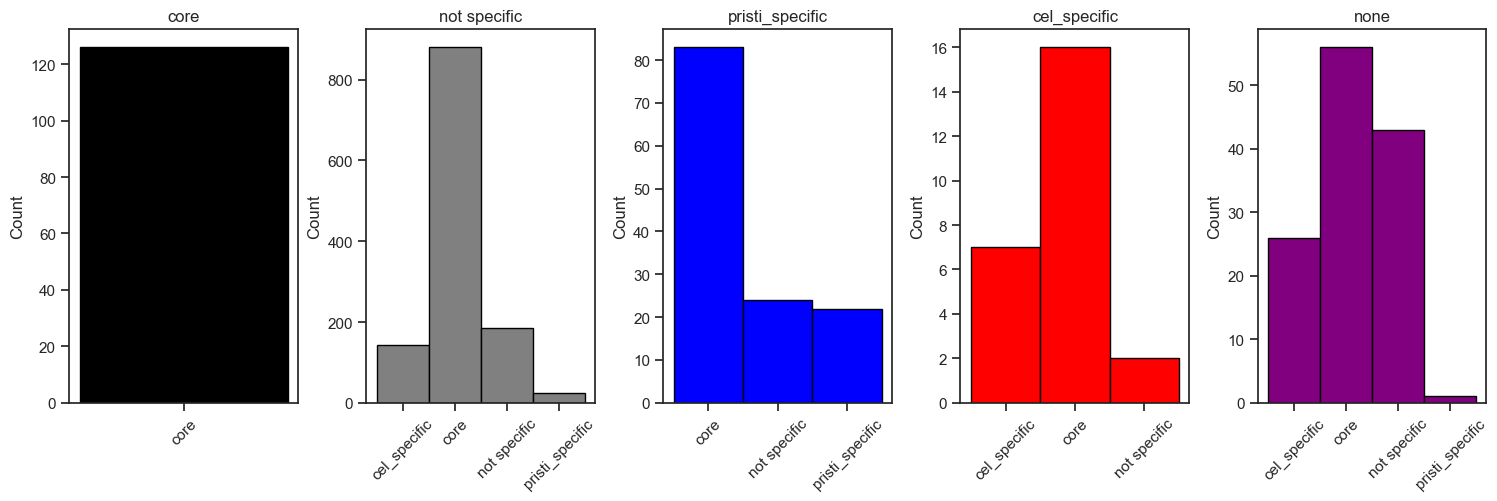

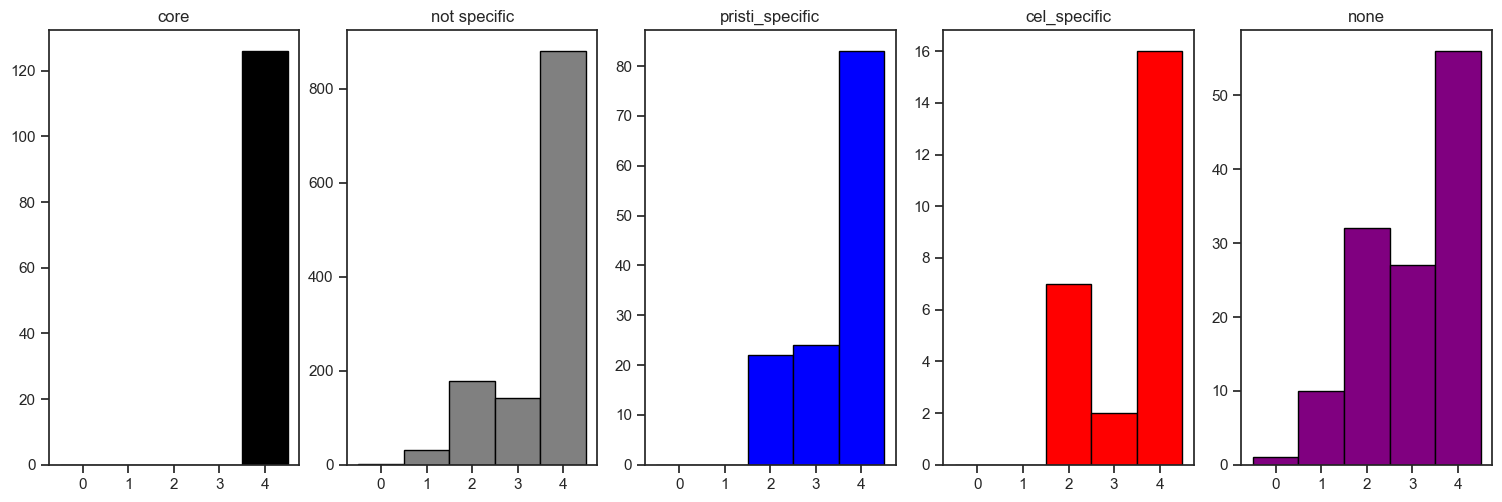

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(peters_df):
    peters_df = peters_df[~((peters_df['specific_syn'] == 'pristi_specific') & (peters_df['specific_adj_adult'] == 'cel_specific'))]

    custom_palette = {"core": "black", "not specific": "gray", "pristi_specific": "blue", "cel_specific": "red", "none": "purple"}
    categories_order = ["core", "not specific", "pristi_specific", "cel_specific", "none"]

    fig, axs = plt.subplots(nrows=1, ncols=len(categories_order), figsize=(15, 5))

    for ax, category in zip(axs, categories_order):
        subset = peters_df[peters_df['specific_syn'] == category]
        subset = subset.sort_values(by="specific_adj_adult")  # Sort the DataFrame
        color = custom_palette[category]
        sns.histplot(data=subset, x="specific_adj_adult", color=color, edgecolor="black", ax=ax, alpha=1)
        ax.set_title(category)

        ax.set_xlabel('')

        # Rotate x-axis labels
        for label in ax.get_xticklabels():
            label.set_rotation(45)

    plt.tight_layout()
    plt.savefig("output/fig4s1_p1.svg")
    plt.show()




def plot_histograms2(peters_df):
    peters_df = peters_df[~((peters_df['specific_syn'] == 'pristi_specific') & (peters_df['specific_adj_adult'] == 'cel_specific'))]

    custom_palette = {"core": "black", "not specific": "gray", "pristi_specific": "blue", "cel_specific": "red", "none": "purple"}
    categories_order = ["core", "not specific", "pristi_specific", "cel_specific", "none"]

    fig, axs = plt.subplots(nrows=1, ncols=len(categories_order), figsize=(15, 5))

    for ax, category in zip(axs, categories_order):
        subset = peters_df[peters_df['specific_syn'] == category]
        subset = subset.sort_values(by="conserved_adult")  # Sort the DataFrame
        color = custom_palette[category]
        ax.hist(subset["conserved_adult"], bins=[0, 1, 2, 3, 4, 5], color=color, edgecolor='black')
        ax.set_title(category)

        # Set x-ticks and x-tick labels
        ax.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5])
        ax.set_xticklabels([0, 1, 2, 3, 4])

        # Rotate x-axis labels
        # for label in ax.get_xticklabels():
        #     label.set_rotation(45)

    plt.tight_layout()
    plt.savefig("output/fig4s1_p2.svg")
    plt.show()

# Usage:

plot_histograms(peters_df)

plot_histograms2(peters_df)






total, core adj, core syn 2473 1006 124
total adult, adult core adj, adult core syn 2021 960 124


/var/folders/_2/0tv8470n4db_swb6k005_qt80000gp/T/ipykernel_92043/2511361545.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig1ax5.set_xticklabels(['No Connection', 'Not specific', 'Core','P. pacificus Specific','C. elegans Specific', 'None'], fontsize = 4)
/var/folders/_2/0tv8470n4db_swb6k005_qt80000gp/T/ipykernel_92043/2511361545.py:156: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig1ax6.set_xticklabels(['', 'Not specific', 'Core','P. pacificus Specific','C. elegans Specific', 'None'], fontsize = 4)


      specific_syn  ave_scaled_adj Species Adjacency
0     not specific        0.239619      P. pacificus
2     not specific        0.392343      P. pacificus
3     not specific        0.392343      P. pacificus
6     not specific       -0.029452      P. pacificus
7     not specific       -0.029452      P. pacificus
...            ...             ...               ...
5568  not specific        0.691167        C. elegans
5594  cel_specific        0.629762        C. elegans
5596  not specific       -0.142671        C. elegans
5636  not specific        0.640433        C. elegans
5665  not specific       -0.757656        C. elegans

[4946 rows x 3 columns]
      specific_syn  ave_syn   Species Syn  log10_values
0     not specific      0.0  P. pacificus      0.000000
1     not specific      2.0  P. pacificus      0.477121
2     not specific      4.0  P. pacificus      0.698970
3     not specific      0.5  P. pacificus      0.176091
4     not specific      0.5  P. pacificus      0.176091
...

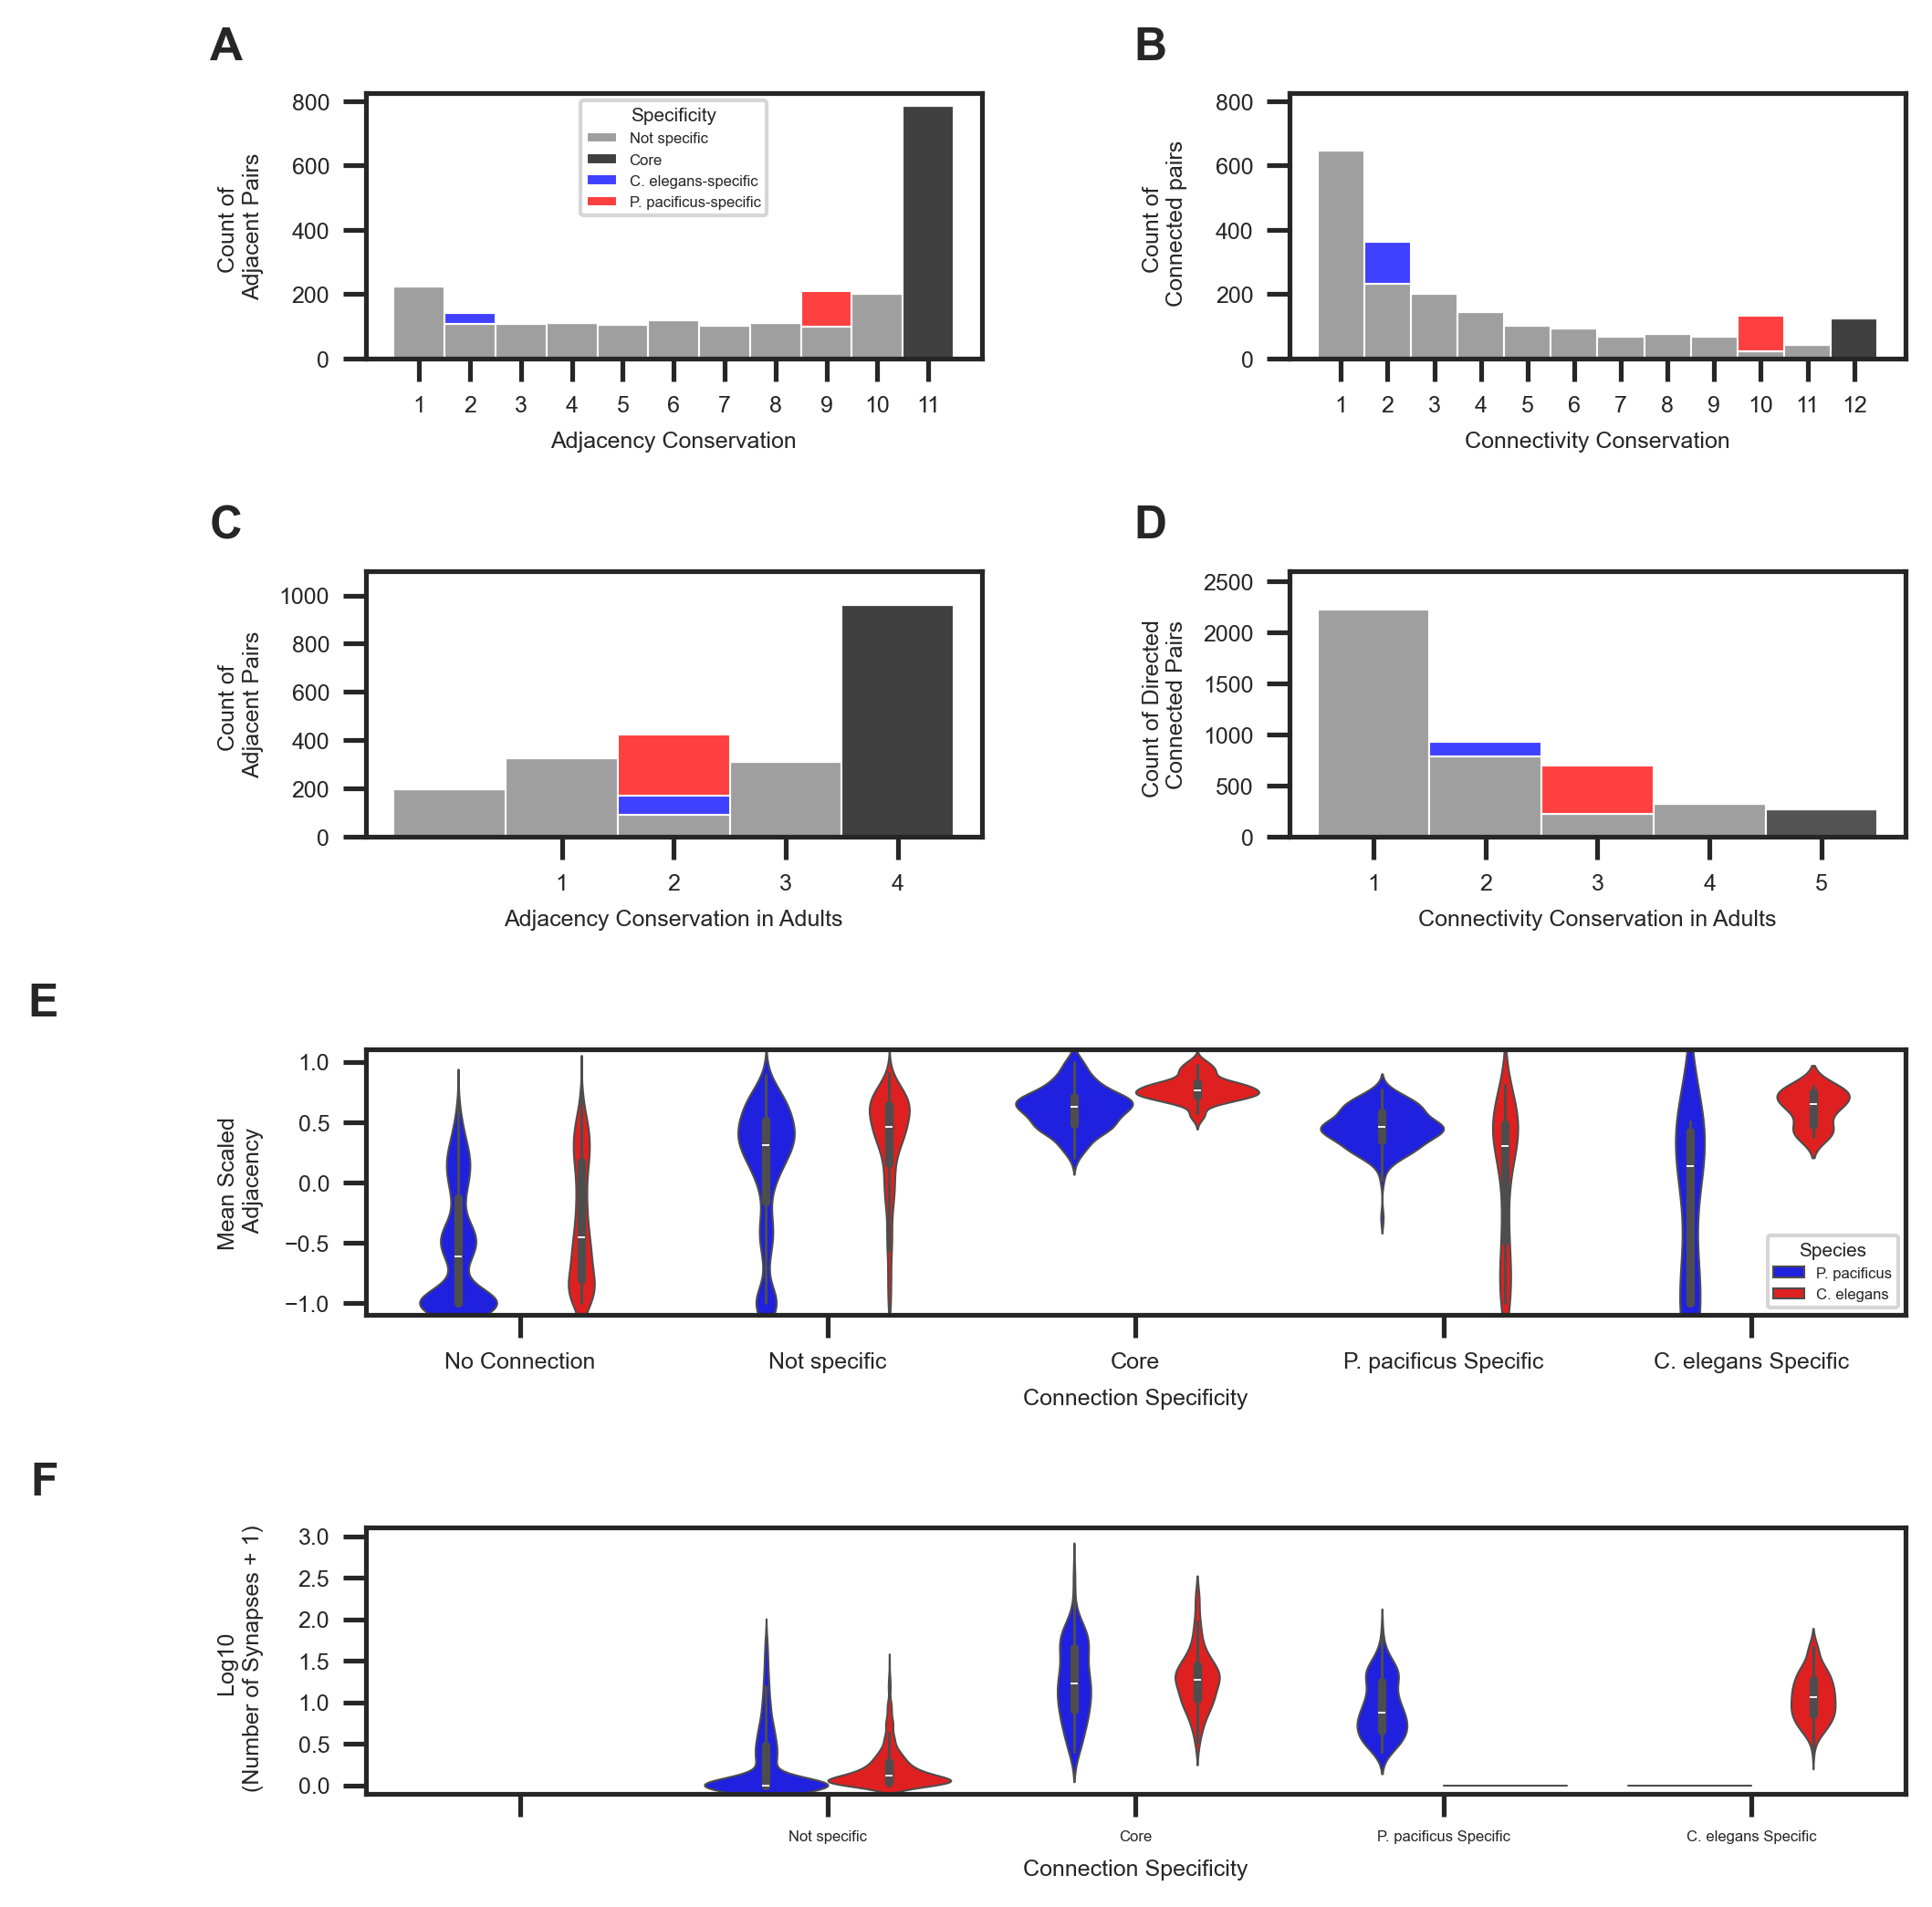

In [63]:
#FIGURE 5 PLOTTING

from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

total_adj = len(merged['specific_adj'])

total_core_adj =  merged['specific_adj'].value_counts()["core"]

total_core_syn = merged['specific_syn'].value_counts()["core"]

print("total, core adj, core syn", total_adj, total_core_adj, total_core_syn)


total_adult_adj = len(df.conserved_adult[df.conserved_adult > 0])

total_adult_core_adj = df['specific_adj_adult'].value_counts()["core"]

total_adult_core_syn = df_merged2['specific_syn'].value_counts()["core"]

print("total adult, adult core adj, adult core syn", total_adult_adj, total_adult_core_adj, total_adult_core_syn)


import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style= 'ticks')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 6})
fig1 = plt.figure(figsize=(7, 7))
fig1.set_dpi(300)



fig1ax1 = fig1.add_subplot(4,2,1)
df[['pre', 'post']] = df[['pre', 'post']].astype("string")
palette ={"cel_specific": "red", "pristi_specific": "blue", "core": "black", "not specific": "tab:gray"}
sns.histplot(ax = fig1ax1, data=df, x="conserved", hue = "specific_adj", hue_order = ['cel_specific', 'pristi_specific', 'core',  'not specific'], discrete = True, multiple="stack", palette = palette, linewidth=.5)
fig1ax1.set_xlabel('Adjacency Conservation', fontsize = 6)
fig1ax1.set_ylabel('Count of \nAdjacent Pairs', fontsize = 6)
fig1ax1.set_ylim([0,825])
fig1ax1.set_yticks([0,200,400,600,800])
fig1ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.tick_params(axis='both', which='major', labelsize=6)
fig1ax1.legend(loc = 'upper center', labels=["Not specific", "Core", "C. elegans-specific", "P. pacificus-specific"], title = "Specificity", fontsize = 4, title_fontsize='5')
fig1ax1.text(-.2, 1.25, 'A', transform=fig1ax1.transAxes,fontsize=12, fontweight='bold', va='top', ha='right')


fig1ax2 = fig1.add_subplot(4,2,2)
sns.histplot(legend = False, ax = fig1ax2, data=df_merged2, x="conserved_syn", discrete=True, hue = 'specific_syn', hue_order = ['cel_specific', 'pristi_specific', 'core',  'not specific'], multiple = 'stack', palette = palette, linewidth = .5)
fig1ax2.set_xlabel('Connectivity Conservation', fontsize = 6)
fig1ax2.set_ylabel('Count of \n Connected pairs', fontsize = 6)
plt.tick_params(axis='both', which='major', labelsize=6)
fig1ax2.set_ylim([0,825])
fig1ax2.set_yticks([0,200,400,600,800])
fig1ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
#fig1ax2.legend(loc = 'upper center',  labels=["Not specific", "Core", "C. elegans-specific", "P. pacificus-specific"], title = "Connection Specificity", fontsize = 4, title_fontsize='5')
fig1ax2.text(-.2, 1.25, 'B', transform=fig1ax2.transAxes,fontsize=12, fontweight='bold', va='top', ha='right')


fig1ax3 = fig1.add_subplot(4,2,3)
df[['pre', 'post']] = df[['pre', 'post']].astype("string")
sns.histplot(legend = False, ax = fig1ax3, data=df, x="conserved_adult", hue = "specific_adj_adult", hue_order = ['cel_specific', 'pristi_specific', 'core',  'not specific'], discrete = True, multiple="stack", palette = palette, linewidth=.5)
fig1ax3.set_xlabel('Adjacency Conservation in Adults', fontsize = 6)
fig1ax3.set_ylabel('Count of \nAdjacent Pairs', fontsize = 6)
fig1ax3.set_ylim([0,1100])
fig1ax3.set_yticks([0,200,400,600,800,1000])
fig1ax3.set_xticks([1,2,3,4])
plt.tick_params(axis='both', which='major', labelsize=6)
#fig1ax3.legend(loc = 'upper left', labels=["Not specific", "Core", "C. elegans-specific", "P. pacificus-specific"], title = "Adjacency Specificity", fontsize = 4, title_fontsize='5')
fig1ax3.text(-.2, 1.25, 'C', transform=fig1ax3.transAxes,fontsize=12, fontweight='bold', va='top', ha='right')



fig1ax4 = fig1.add_subplot(4,2,4)
palette1 ={"cel_specific": "red", "pristi_specific": "blue", "core": "k", "not specific": "tab:gray"}
sns.histplot(legend = False, ax = fig1ax4, data=directed_df, x="how_many_datasets_have_syn", discrete=True, hue = 'species_specific', hue_order = ['cel_specific', 'pristi_specific', 'core',  'not specific'], multiple = 'stack', palette = palette1, linewidth = .5)
fig1ax4.set_xlabel('Connectivity Conservation in Adults', fontsize = 6)
fig1ax4.set_ylabel('Count of Directed \nConnected Pairs', fontsize = 6)
plt.tick_params(axis='both', which='major', labelsize=6)
fig1ax4.set_ylim([0,2600])
fig1ax4.set_yticks([0,500,1000,1500,2000, 2500])
fig1ax4.set_xticks([1,2,3,4,5])
#fig1ax4.legend(loc = 'upper center',  labels=["Not specific", "Core", "C. elegans-specific", "P. pacificus-specific"], title = "Connection Specificity", fontsize = 4, title_fontsize='5')
fig1ax4.text(-.2, 1.25, 'D', transform=fig1ax4.transAxes,fontsize=12, fontweight='bold', va='top', ha='right')



fig1ax5 = fig1.add_subplot(4,2,(5,6))
import statsmodels.stats.multicomp as mc
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
# merged_undirected_adj_syn = reduce(lambda left,right: pd.merge(left,right,on=['pre','post'], how='left'), [male_merged_class_undirected, male_merged_class_undirected_adj]).fillna(0)
adjcols = ['witvliet_1', 'witvliet_2', 'witvliet_3', 'witvliet_4', 'witvliet_5', 'witvliet_6', 'cel_jsh', 'witvliet_8', 'cel_n2u', 'pristi_s14', 'pristi_s15']
new_cols2 = [x + '-S-log10' for x in adjcols]
def take_log10(x,y):
  #x=dataframe, y=column, z=newlistname
  for i in y:
    x[i + '-S-log10'] = np.log10(x[i] + 1).astype('float64')
  return x
cel_cols = ['witvliet_1-S-log10', 'witvliet_2-S-log10', 'witvliet_3-S-log10','witvliet_4-S-log10', 'witvliet_5-S-log10', 'witvliet_6-S-log10', 'cel_jsh-S-log10', 'witvliet_8-S-log10', 'cel_n2u-S-log10']
pristi_cols = ['pristi_s14-S-log10', 'pristi_s15-S-log10']
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))
take_log10(merged, adjcols)
df_scale = pd.DataFrame(scaler.fit_transform(merged.loc[:,new_cols2]))
df_scale.rename(columns=dict(zip(df_scale.columns[[0,1,2,3,4,5,6,7,8,9,10]], new_cols2)), inplace=True)
df_scale['ave_scaled_adj_cel'] = df_scale[cel_cols].mean(axis=1)
df_scale['ave_scaled_adj_pristi'] = df_scale[pristi_cols].mean(axis=1)
df_scale.to_csv('df_scale_test.csv')
merged = merged.drop(columns=new_cols2)
df1 = pd.concat([merged, df_scale.set_index(merged.index)], axis=1)
#print(merged['specific_syn'].unique())
#print(df1['specific_syn'].unique())
#y_pal = {"not specific": "tab:grey", "cel_specific": "#99000D", "pristi_specific":"#225EA8", 'core': '#4C4E52' }
my_pal = { "C. elegans": "red", "P. pacificus":"blue"}
dfcel = df1[['specific_syn','ave_scaled_adj_cel']].copy().rename(columns={'ave_scaled_adj_cel': 'ave_scaled_adj'})
dfcel['Species Adjacency'] = 'C. elegans'
dfpristi = df1[['specific_syn', 'ave_scaled_adj_pristi']].copy().rename(columns={'ave_scaled_adj_pristi': 'ave_scaled_adj'})
dfpristi['Species Adjacency'] = 'P. pacificus'
contactdf = pd.concat([dfpristi, dfcel])
#print(contactdf['specific_syn'].unique())
#sns.swarmplot(ax = fig1ax3, data = contactdf, y = 'specific_syn', x='ave_scaled_adj', hue='Species Adjacency', palette = my_pal, linewidth= .5, size=2)
sns.violinplot(ax = fig1ax5, data = contactdf, y = 'ave_scaled_adj', x='specific_syn', hue='Species Adjacency', palette = my_pal, linewidth= .5, order=['none', 'not specific', 'core', 'pristi_specific', 'cel_specific'])

# plt1 = sns.boxplot(data = contactdf, y = 'specific_syn', x='ave_scaled_adj', size=3, alpha=0.4, hue = 'Species Adjacency')
fig1ax5.set_ylabel('Mean Scaled\n Adjacency', fontsize = 6)
fig1ax5.set_xlabel('Connection Specificity', fontsize = 6)
fig1ax5.set_xticklabels(['No Connection', 'Not specific', 'Core','P. pacificus Specific','C. elegans Specific', 'None'], fontsize = 4)
fig1ax5.set_ylim([-1.1,1.1])
fig1ax5.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.tick_params(axis='both', which='major', labelsize=6)
fig1ax5.legend( fontsize='4', loc = 'lower right', title_fontsize='5', title='Species')
fig1ax5.text(-.2, 1.25, 'E', transform=fig1ax5.transAxes,fontsize=12, fontweight='bold', va='top', ha='right')


print(contactdf)

fig1ax6 = fig1.add_subplot(4,2,(7,8))


dfcel_syn = df_merged2[['specific_syn','average_cel_syn_size']].copy().rename(columns={'average_cel_syn_size': 'ave_syn'})
dfcel_syn['Species Syn'] = 'C. elegans'
dfpristi_syn = df_merged2[['specific_syn', 'average_pristi_syn_size']].copy().rename(columns={'average_pristi_syn_size': 'ave_syn'})
dfpristi_syn['Species Syn'] = 'P. pacificus'
df_fig1ax6 = pd.concat([dfpristi_syn, dfcel_syn])
df_fig1ax6 = df_fig1ax6.assign(log10_values=np.log10(df_fig1ax6['ave_syn'] + 1))
print(df_fig1ax6)
fig1ax6.set_ylabel('Log10 \n (Number of Synapses + 1)', fontsize = 6)

fig1ax6.set_xlabel('Connection Specificity', fontsize = 6)
plt.tick_params(axis='both', which='major', labelsize=6)
df_fig1ax6.to_csv("fig1ax6.csv")
fig1ax6.set_xticklabels(['', 'Not specific', 'Core','P. pacificus Specific','C. elegans Specific', 'None'], fontsize = 4)
fig1ax6 = sns.violinplot(data = df_fig1ax6, y = 'log10_values', x='specific_syn', hue='Species Syn', palette = my_pal, linewidth= .5, order=['none', 'not specific', 'core', 'pristi_specific', 'cel_specific'], legend = False)
fig1ax6.set_ylim([-0.1,3.1])
fig1ax6.set_yticks([0,0.5,1.0,1.5,2.0,2.5,3.0])


fig1ax6.text(-.2, 1.25, 'F', transform=fig1ax6.transAxes,fontsize=12, fontweight='bold', va='top', ha='right')


fig1.align_ylabels()
fig1.tight_layout()
fig1.subplots_adjust(wspace=0.5, hspace=0.8)
plt.savefig("output/pristi_5_working.svg")
plt.savefig("output/pristi_5_working.png")


def perform_mann_whitney_u_test(df, condition_column, value_column, group_column):
    conditions = df[condition_column].unique()
    p_values = []
    u_statistics = []  # List to store U statistics
    for condition in conditions:
        group1 = df[(df[condition_column] == condition) & (df[group_column] == 'C. elegans')][value_column]
        group2 = df[(df[condition_column] == condition) & (df[group_column] == 'P. pacificus')][value_column]
        u, p = mannwhitneyu(group1, group2)
        p_values.append(p)
        u_statistics.append(u)  # Append U statistic to the list

    # Apply Bonferroni correction
    _, corrected_p_values, _, _ = multipletests(p_values, method='bonferroni')

    for condition, corrected_p, u_stat in zip(conditions, corrected_p_values, u_statistics):
        print(f'Condition: {condition}, U statistic: {u_stat}, Corrected p-value: {format(corrected_p, ".2e")}')


print("adjacency comps for fig E")
perform_mann_whitney_u_test(contactdf, 'specific_syn', 'ave_scaled_adj', 'Species Adjacency')
print("connectivity comps for fig F")
perform_mann_whitney_u_test(df_fig1ax6, 'specific_syn', 'log10_values', 'Species Syn')





# process new df for supplemental figure

# palette ={"Cel-specific output": "#880808", "Cel-specific input": "#D2042D","Pristi-specific output": "#89CFF0", "Pristi-specific input": "#0047AB"}



# def process_df(dfn, species_output, species_input):
#     df_output = dfn[['pre', 'post']].copy()
#     df_output['species'] = species_output
#     df_output.rename(columns={'pre': 'neuron'}, inplace=True)

#     df_input = dfn[['pre', 'post']].copy()
#     df_input['species'] = species_input
#     df_input.rename(columns={'post': 'neuron'}, inplace=True)

#     return pd.concat([df_output, df_input])[['neuron', 'species']]

# # Use the function to create df1
# dfn_pristi = df_merged2[df_merged2['specific_syn'] == 'pristi_specific'].reset_index(drop=True)
# dfn_cel = df_merged2[df_merged2['specific_syn'] == 'cel_specific'].reset_index(drop=True)

# df1 = pd.concat([
#     process_df(dfn_pristi, 'Pristi-specific output', 'Pristi-specific input'),
#     process_df(dfn_cel, 'Cel-specific output', 'Cel-specific input')
# ]).sort_values('neuron').reset_index(drop=True)



# dfn = df_merged2.groupby(['pre','post','specific_syn']).size().reset_index(name='count')
# df_post = dfn[['post','specific_syn', 'count']].rename(columns={"post": "neuron"})
# df_pre = dfn[['pre','specific_syn', 'count']].rename(columns={"pre": "neuron"})
# df_combo = [df_pre, df_post]
# df_new = pd.concat(df_combo).reset_index(drop=True)
# df_new = df_new.groupby(['neuron', 'specific_syn']).size().unstack().reset_index().fillna(0)
# df_new['cel_specific_portion'] = (((df_new['cel_specific']) / (df_new['cel_specific']+df_new['pristi_specific']+ df_new['not specific']+ df_new['core'])))*100
# df_new['pristi_specific_portion'] = ((df_new['pristi_specific']) / (df_new['cel_specific']+df_new['pristi_specific']+df_new['not specific']+ df_new['core']))*100
# df_new['not_specific_portion'] = ((df_new['not specific'] + df_new['core']) / (df_new['cel_specific']+df_new['pristi_specific']+df_new['not specific']+ df_new['core']))*100
# dfnumbers = df_new.copy()
# df_new = df_new[(df_new['cel_specific'] >0) | (df_new['pristi_specific'] > 0)].reset_index(drop = True)
# df_new = df_new.sort_values('neuron', ascending=False)

# # # # df_new[['neuron','sex_specific_portion', 'not_specific_portion']].plot(x='neuron', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')
# # # plt.rcParams["figure.figsize"] = [10, 20]
# # # plt.rcParams["figure.autolayout"] = True
# # b1 = plt.barh(df_new['neuron'], df_new['cel_specific_portion'], color="#880808")
# # b2 = plt.barh(df_new['neuron'], df_new['pristi_specific_portion'], left=df_new['cel_specific_portion'], color="#0047AB")

# neurons_new = df_new.neuron.unique()
# neurons_pre = df_pre.neuron.unique()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), dpi=300)
# plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.0, right=0.01)
# plt.rcParams["figure.autolayout"] = True

# # Plot on ax1
# ax1.barh(df_new['neuron'], df_new['cel_specific_portion'], color="#880808")
# ax1.barh(df_new['neuron'], df_new['pristi_specific_portion'], left=df_new['cel_specific_portion'], color="#0047AB")
# ax1.yaxis.tick_right()
# ax1.set_yticklabels([])
# ax1.legend(["C. elegans Specific","P. pacificus Specific"], title="Connection Type", loc="upper left")
# ax1.set_xlabel("Percentage of all connections")
# ax1.invert_xaxis()

# # Plot on ax2
# sns.histplot(y="neuron", hue='species', hue_order=["Cel-specific output", "Cel-specific input","Pristi-specific output", "Pristi-specific input"], multiple='stack', data=df1, palette=palette, ax=ax2)
# ax2.set_ylabel('')
# ax2.tick_params(axis='y', labelsize=10)
# ax2.set_xticks(range(15))
# ax2.set_xlabel("Count of connection type")
# ax2.legend(["Pristi-specific output", "Pristi-specific input","Cel-specific output", "Cel-specific input"], title='Connection Type', loc='upper right')

# # Save figure
# plt.savefig("/content/drive/MyDrive/pristi_working/pristi_code/output/pristi_fig3ii.svg")
# plt.savefig("/content/drive/MyDrive/pristi_working/pristi_code/output/pristi_fig3ii.png")

# neurons_new = df_new.neuron.unique()
# neurons_pre = df_pre.neuron.unique()

# # Print sorted list of all species dimorphic neurons
# print("List of all species dimorphic neurons:", sorted(neurons_new), "Total:", len(neurons_new))

# # Print neurons in pre that are not in new
# print("Neurons in pre not in new:", [x for x in neurons_pre if x not in neurons_new])


List of all species dimorphic neurons: ['ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY', 'AIZ', 'ALA', 'ALM', 'ASE', 'ASG', 'ASH', 'ASI', 'ASK', 'AUA', 'AVA', 'AVB', 'AVD', 'AVE', 'AVH', 'AVJ', 'AVK', 'AVL', 'AWA', 'AWB', 'AWC', 'BAG', 'BDU', 'CEP', 'DVA', 'DVC', 'FLP', 'IL1', 'IL2', 'OLL', 'OLQ', 'PVC', 'PVP', 'PVQ', 'PVR', 'PVT', 'RIA', 'RIB', 'RIC', 'RIF', 'RIG', 'RIH', 'RIM', 'RIP', 'RIR', 'RIS', 'RIV', 'RMD', 'RME', 'RMG', 'SAA', 'SIB', 'SMB', 'SMD', 'URA', 'URB', 'URX', 'URY'] Total: 67
Neurons in pre not in new: ['ALN', 'ASJ', 'RID', 'SIA']
Neurons in post not in new: ['ALN', 'RID', 'ASJ', 'SIA', 'CAN']


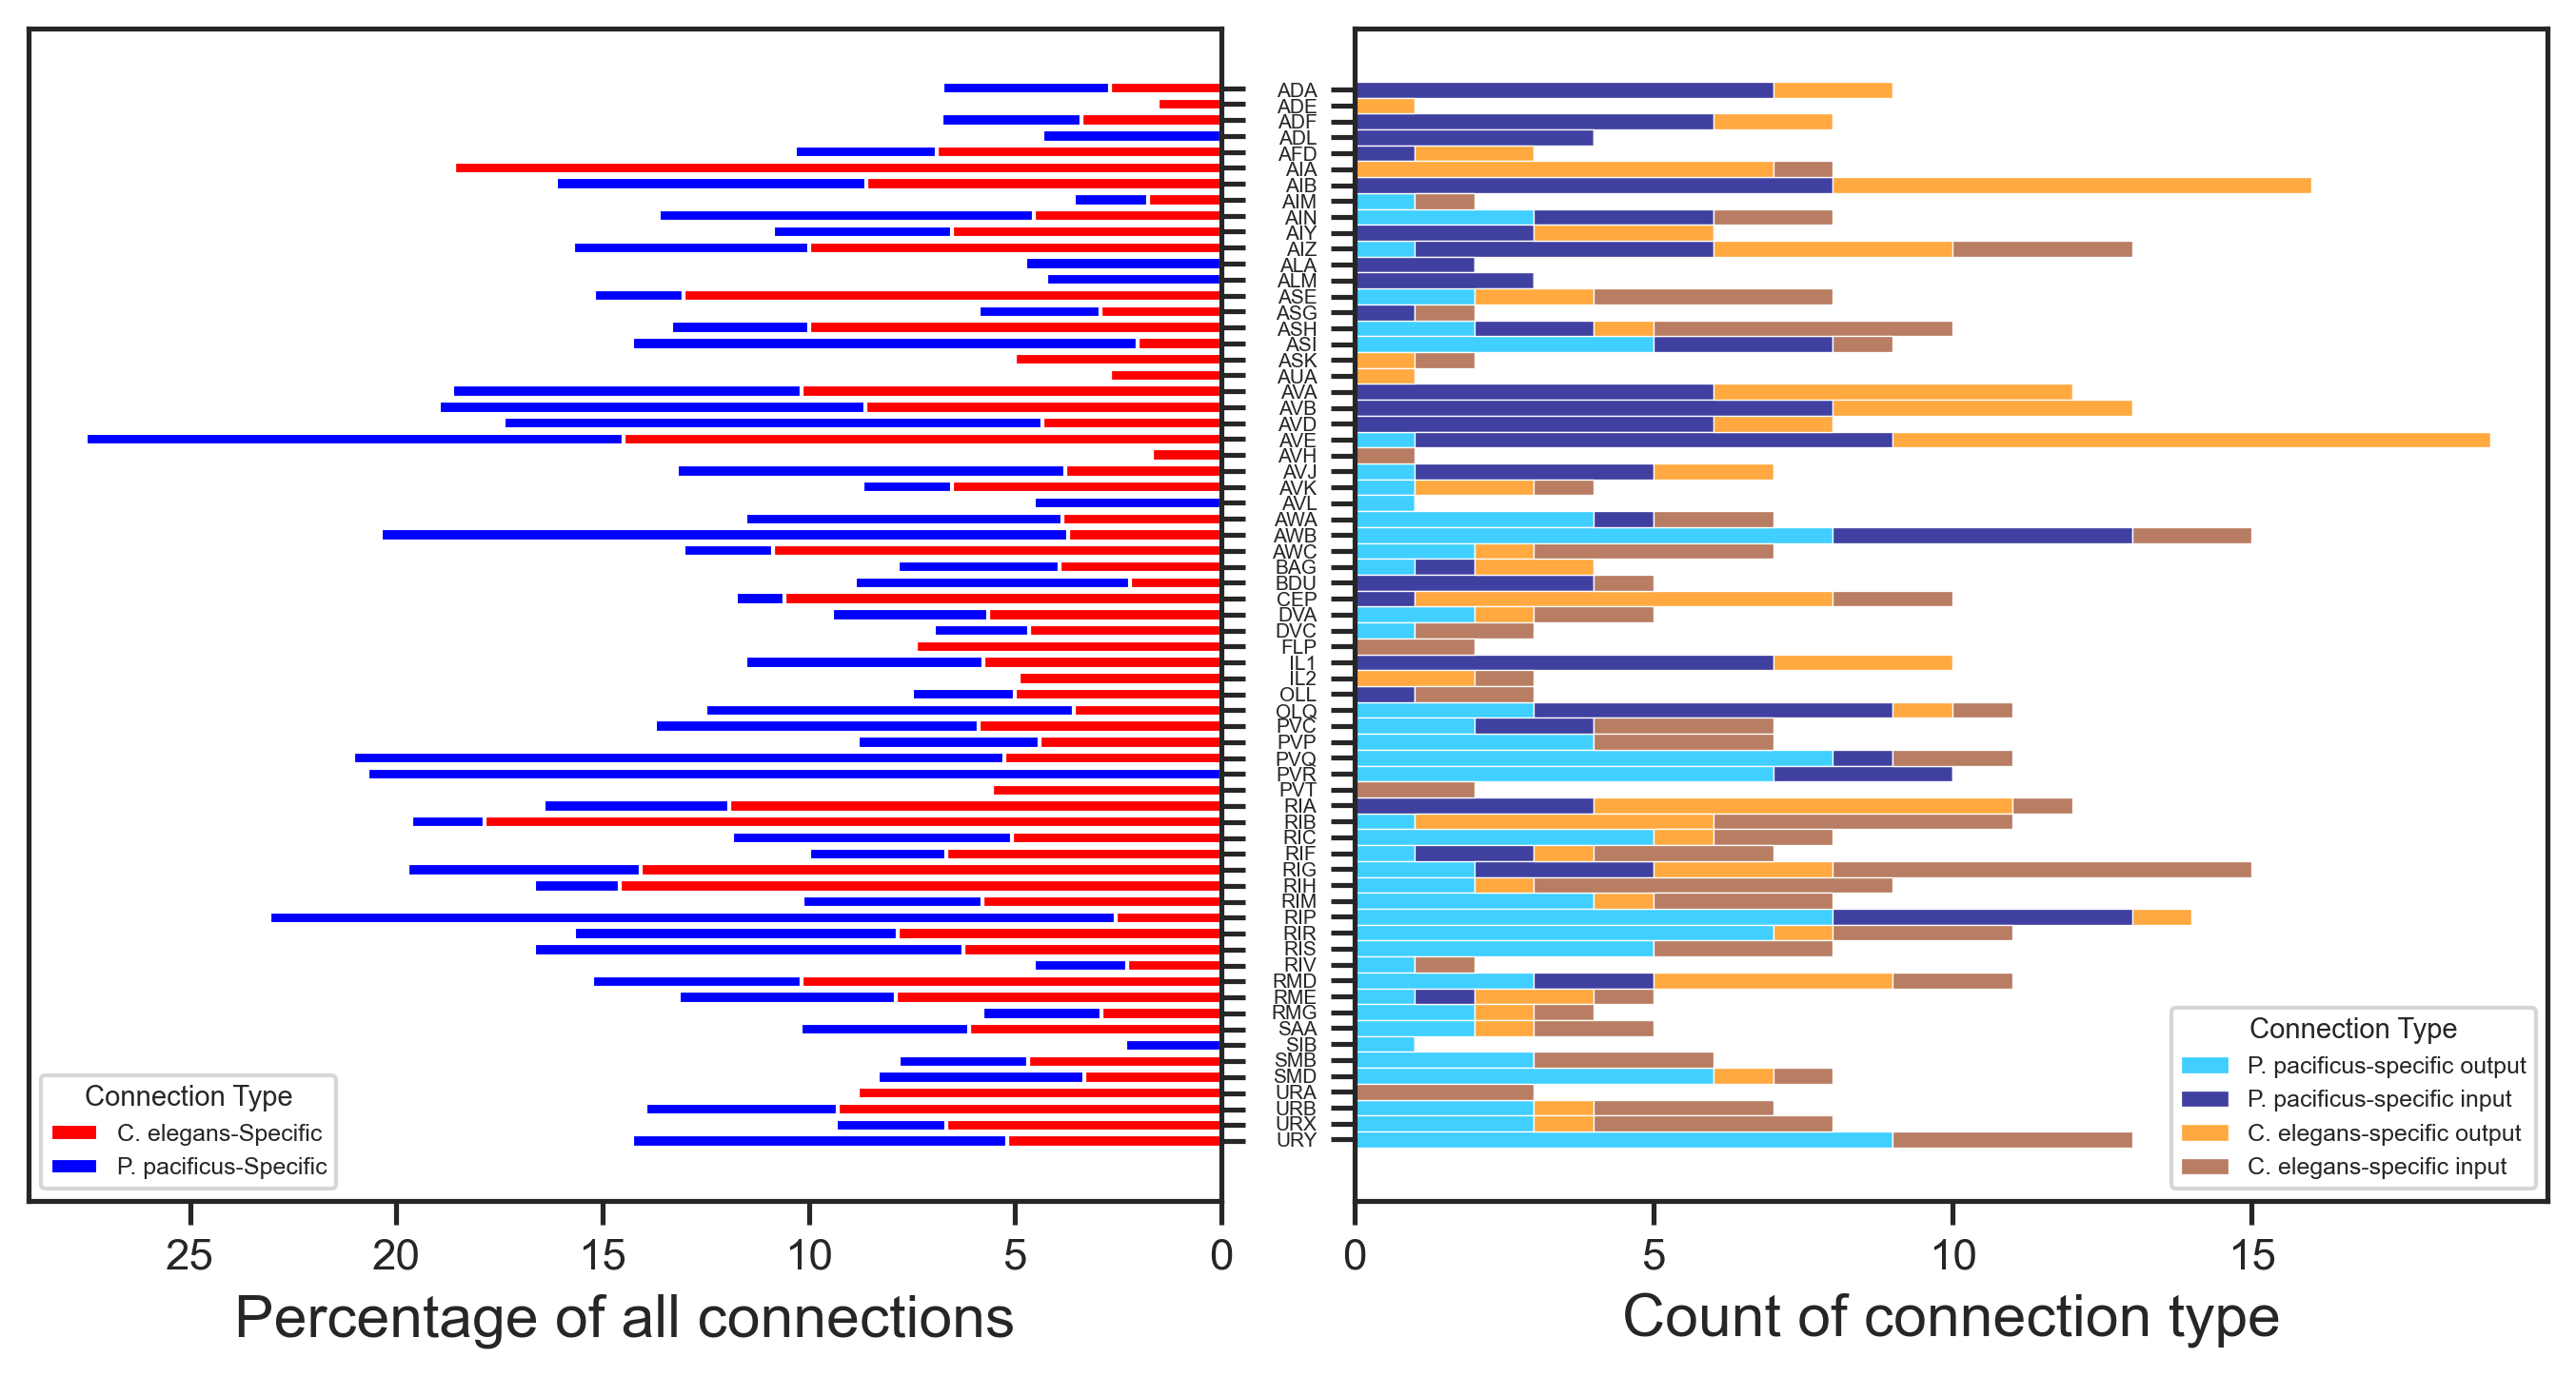

In [64]:

#Figure 3 Sup1 plotting

def process_df(dfn, species_output, species_input):
    df_output = dfn[['pre', 'post']].copy()
    df_output['species'] = species_output
    df_output.rename(columns={'pre': 'neuron'}, inplace=True)

    df_input = dfn[['pre', 'post']].copy()
    df_input['species'] = species_input
    df_input.rename(columns={'post': 'neuron'}, inplace=True)

    return pd.concat([df_output, df_input])[['neuron', 'species']]

# Use the function to create df1
dfn_pristi = df_merged2[df_merged2['specific_syn'] == 'pristi_specific'].reset_index(drop=True)
dfn_cel = df_merged2[df_merged2['specific_syn'] == 'cel_specific'].reset_index(drop=True)

df1 = pd.concat([
    process_df(dfn_pristi, 'Pristi-specific output', 'Pristi-specific input'),
    process_df(dfn_cel, 'Cel-specific output', 'Cel-specific input')
]).sort_values('neuron').reset_index(drop=True)



dfn = df_merged2.groupby(['pre','post','specific_syn']).size().reset_index(name='count')
df_post = dfn[['post','specific_syn', 'count']].rename(columns={"post": "neuron"})
df_pre = dfn[['pre','specific_syn', 'count']].rename(columns={"pre": "neuron"})
df_combo = [df_pre, df_post]
df_new = pd.concat(df_combo).reset_index(drop=True)
df_new = df_new.groupby(['neuron', 'specific_syn']).size().unstack().reset_index().fillna(0)
df_new['cel_specific_portion'] = (((df_new['cel_specific']) / (df_new['cel_specific']+df_new['pristi_specific']+ df_new['not specific']+ df_new['core'])))*100
df_new['pristi_specific_portion'] = ((df_new['pristi_specific']) / (df_new['cel_specific']+df_new['pristi_specific']+df_new['not specific']+ df_new['core']))*100
df_new['not_specific_portion'] = ((df_new['not specific'] + df_new['core']) / (df_new['cel_specific']+df_new['pristi_specific']+df_new['not specific']+ df_new['core']))*100
#uncommenting to add all neurons to the plot
df_new = df_new.loc[(df_new['cel_specific'] > 0) | (df_new['pristi_specific'] > 0)]
df_new = df_new.sort_values('neuron', ascending=False)

# # # df_new[['neuron','sex_specific_portion', 'not_specific_portion']].plot(x='neuron', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')
# # plt.rcParams["figure.figsize"] = [10, 20]
# # plt.rcParams["figure.autolayout"] = True
# b1 = plt.barh(df_new['neuron'], df_new['cel_specific_portion'], color="#880808")
# b2 = plt.barh(df_new['neuron'], df_new['pristi_specific_portion'], left=df_new['cel_specific_portion'], color="#0047AB")


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style= 'ticks')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 6})
fig1 = plt.figure(figsize=(9, 9))
fig1.set_dpi(300)





ax1 = fig1.add_subplot(4,2,(1,3))

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 2, 3, 4, figsize=(20, 10), dpi=300)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.0, right=0.01)
plt.rcParams["figure.autolayout"] = True
palette2 ={"Cel-specific output": "sienna", "Cel-specific input": "darkorange","Pristi-specific output": "navy", "Pristi-specific input": "deepskyblue"}


# Plot on ax1
ax1.barh(df_new['neuron'], df_new['cel_specific_portion'], color="red")
ax1.barh(df_new['neuron'], df_new['pristi_specific_portion'], left=df_new['cel_specific_portion'], color="blue")
ax1.yaxis.tick_right()
ax1.set_yticklabels([])
ax1.legend(["C. elegans-Specific","P. pacificus-Specific"], title="Connection Type", loc="lower left", fontsize='6', title_fontsize='7')
ax1.set_xlabel("Percentage of all connections", fontsize=15)
ax1.invert_xaxis()
#ax1.set_xticks(range(21))
ax1.set_xticks([0,5,10,15,20,25])


ax2 = fig1.add_subplot(4,2,(2,4))
# Plot on ax2
sns.histplot(y="neuron", hue='species', hue_order=["Cel-specific output", "Cel-specific input","Pristi-specific output", "Pristi-specific input"], multiple='stack', data=df1, palette=palette2, ax=ax2)
ax2.set_ylabel('')
ax2.yaxis.set_label_coords(-0.1, 0.5)
ax2.tick_params(axis='y', labelsize=5)
ax2.set_xticks([0,5,10,15])
ax2.set_xlabel("Count of connection type", fontsize=15)
ax2.legend(["P. pacificus-specific output", "P. pacificus-specific input","C. elegans-specific output", "C. elegans-specific input"], title='Connection Type', loc='lower right', fontsize='6', title_fontsize='7')
# Save figure


neurons_new = df_new.neuron.unique()
neurons_pre = df_pre.neuron.unique()
neurons_post = df_post.neuron.unique()


# Print sorted list of all species dimorphic neurons
print("List of all species dimorphic neurons:", sorted(neurons_new), "Total:", len(neurons_new))
print("Neurons in pre not in new:", [x for x in neurons_pre if x not in neurons_new])
print("Neurons in post not in new:", [x for x in neurons_post if x not in neurons_new])



plt.savefig("output/pristi_fig3s1.svg")
plt.savefig("output/pristi_fig3s1.png")






#'herm_specific', 'pristi_specific', 'core'

# plt.rcParams['pdf.fonttype'] = 42
# fig, ax = plt.subplots(figsize=(10, 20))
# palette ={"Cel-specific output": "#880808", "Cel-specific input": "#D2042D","Pristi-specific output": "#89CFF0", "Pristi-specific input": "#0047AB"}



# dfn = df_merged2[df_merged2['specific_syn'] =='pristi_specific'].reset_index(drop = True)
# df1 = dfn[['pre','post']].copy()
# df1['species'] = 'Pristi-specific output'
# df1.rename({'pre': 'neuron'}, axis=1, inplace=True)
# df1 = df1[['neuron','species']].copy()

# df2 = dfn[['pre','post']].copy()
# df2['species'] = 'Pristi-specific input'
# df2.rename({'post': 'neuron'}, axis=1, inplace=True)
# df2 = df2[['neuron','species']].copy()
# df1 = df1.append(df2, ignore_index=True)

# dfn = df_merged2[df_merged2['specific_syn'] =='cel_specific'].reset_index(drop = True)
# df3 = dfn[['pre','post']].copy()
# df3['species'] = 'Cel-specific output'
# df3.rename({'pre': 'neuron'}, axis=1, inplace=True)
# df3 = df3[['neuron','species']].copy()
# df1 = df1.append(df3, ignore_index=True)


# df4 = dfn[['pre','post']].copy()
# df4['species'] = 'Cel-specific input'
# df4.rename({'post': 'neuron'}, axis=1, inplace=True)
# df4 = df4[['neuron','species']].copy()
# df1 = df1.append(df4, ignore_index=True)
# df1 = df1.sort_values('neuron')
# # male_nspecific = ['EFn', 'MCM', 'CEM']
# # df1 = df1[df1["neuron"].str.contains("EFn|MCM|CEM") == False]
# print(df1)

# palette ={"Cel-specific output": "#880808", "Cel-specific input": "#D2042D","Pristi-specific output": "#89CFF0", "Pristi-specific input": "#0047AB"}
# # plt1 = sns.histplot(y="neuron", hue = 'species', hue_order= ["Pristi-specific output", "Pristi-specific input","Cel-specific output", "Cel-specific input"], palette = palette, multiple = 'stack', data=df1, shrink = .7)
# # plt1.set_xlabel('Number of species-specific connections')
# # plt1.set_ylabel('Neurons')
# # # plt1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11, 12, 13, 14, 15, 16, 17, 18])
# # plt.show()


# # fig, ax = plt.subplots(figsize=(10, 20))


# dfn = df_merged2.groupby(['pre','post','specific_syn']).size().reset_index(name='count')
# df_post = dfn[['post','specific_syn', 'count']].rename(columns={"post": "neuron"})
# df_pre = dfn[['pre','specific_syn', 'count']].rename(columns={"pre": "neuron"})
# df_combo = [df_pre, df_post]
# df_new = pd.concat(df_combo).reset_index(drop=True)
# df_new = df_new.groupby(['neuron', 'specific_syn']).size().unstack().reset_index().fillna(0)
# df_new['cel_specific_portion'] = (((df_new['cel_specific']) / (df_new['cel_specific']+df_new['pristi_specific']+ df_new['not specific']+ df_new['core'])))*100
# df_new['pristi_specific_portion'] = ((df_new['pristi_specific']) / (df_new['cel_specific']+df_new['pristi_specific']+df_new['not specific']+ df_new['core']))*100
# df_new['not_specific_portion'] = ((df_new['not specific'] + df_new['core']) / (df_new['cel_specific']+df_new['pristi_specific']+df_new['not specific']+ df_new['core']))*100
# dfnumbers = df_new.copy()
# df_new = df_new[(df_new['cel_specific'] >0) | (df_new['pristi_specific'] > 0)].reset_index(drop = True)
# df_new = df_new.sort_values('neuron', ascending=False)

# # # df_new[['neuron','sex_specific_portion', 'not_specific_portion']].plot(x='neuron', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')
# # plt.rcParams["figure.figsize"] = [10, 20]
# # plt.rcParams["figure.autolayout"] = True
# b1 = plt.barh(df_new['neuron'], df_new['cel_specific_portion'], color="#880808")
# b2 = plt.barh(df_new['neuron'], df_new['pristi_specific_portion'], left=df_new['cel_specific_portion'], color="#0047AB")

# # plt.legend([b1, b2], ["Cel Specific","Pristi Specific"], title="Connection Type", loc="upper right")
# # plt.xlabel('Proportion of total synapses')
# # plt.ylabel('Neurons')
# # plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11, 12, 13, 14, 15, 16, 17, 18])
# #figax1.invert_xaxis()

# # plt.show()


# neurons_new = df_new.neuron.unique()
# neurons_pre = df_pre.neuron.unique()

# # Print sorted list of all species dimorphic neurons
# print("List of all species dimorphic neurons:", sorted(neurons_new), "Total:", len(neurons_new))

# # Print neurons in pre that are not in new
# print("Neurons in pre not in new:", [x for x in neurons_pre if x not in neurons_new])

# # Set up figure
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), dpi=300)
# plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.0, right=0.01)
# plt.rcParams["figure.autolayout"] = True

# # Plot on ax1
# ax1.barh(df_new['neuron'], df_new['cel_specific_portion'], color="#880808")
# ax1.barh(df_new['neuron'], df_new['pristi_specific_portion'], left=df_new['cel_specific_portion'], color="#0047AB")
# ax1.yaxis.tick_right()
# ax1.set_yticklabels([])
# ax1.legend(["C. elegans Specific","P. pacificus Specific"], title="Connection Type", loc="upper left")
# ax1.set_xlabel("Percentage of all connections")
# ax1.invert_xaxis()

# # Plot on ax2
# sns.histplot(y="neuron", hue='species', hue_order=["Cel-specific output", "Cel-specific input","Pristi-specific output", "Pristi-specific input"], multiple='stack', data=df1, palette=palette, ax=ax2)
# ax2.set_ylabel('')
# ax2.tick_params(axis='y', labelsize=10)
# ax2.set_xticks(range(15))
# ax2.set_xlabel("Count of connection type")
# ax2.legend(["Pristi-specific output", "Pristi-specific input","Cel-specific output", "Cel-specific input"], title='Connection Type', loc='upper right')



# # Save figure
# plt.savefig("/content/drive/MyDrive/pristi_working/pristi_code/output/pristi_fig3ii.svg")
# plt.savefig("/content/drive/MyDrive/pristi_working/pristi_code/output/pristi_fig3ii.png")



# #supplemental



/var/folders/_2/0tv8470n4db_swb6k005_qt80000gp/T/ipykernel_92043/2964866444.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])


['ADA' 'ADE' 'ADF' 'ADL' 'AFD' 'AIA' 'AIB' 'AIM' 'AIN' 'AIY' 'AIZ' 'ALA'
 'ALM' 'ALN' 'AQR' 'ASE' 'ASG' 'ASH' 'ASI' 'ASJ' 'ASK' 'AUA' 'AVA' 'AVB'
 'AVD' 'AVE' 'AVF' 'AVH' 'AVJ' 'AVK' 'AVL' 'AVM' 'AWA' 'AWB' 'AWC' 'BAG'
 'BDU' 'CEP' 'DBn' 'DVA' 'DVC' 'FLP' 'HSN' 'IL1' 'IL2' 'OLL' 'OLQ' 'PLN'
 'PVC' 'PVD' 'PVN' 'PVP' 'PVQ' 'PVR' 'PVT' 'RIA' 'RIB' 'RIC' 'RID' 'RIF'
 'RIG' 'RIH' 'RIM' 'RIP' 'RIR' 'RIS' 'RIV' 'RMD' 'RME' 'RMF' 'RMG' 'RMH'
 'SAA' 'SDQ' 'SIA' 'SIB' 'SMB' 'SMD' 'URA' 'URB' 'URX' 'URY' 'VCn']
List of all species dimorphic neurons (directed): ['ADA', 'ADE', 'ADF', 'ADL', 'AFD', 'AIA', 'AIB', 'AIM', 'AIN', 'AIY', 'AIZ', 'ALA', 'ALM', 'ALN', 'AQR', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'AUA', 'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVJ', 'AVK', 'AVL', 'AVM', 'AWA', 'AWB', 'AWC', 'BAG', 'BDU', 'CEP', 'DVA', 'DVC', 'FLP', 'HSN', 'IL1', 'IL2', 'OLL', 'OLQ', 'PLN', 'PVC', 'PVD', 'PVN', 'PVP', 'PVQ', 'PVR', 'PVT', 'RIA', 'RIB', 'RIC', 'RID', 'RIF', 'RIG', 'RIH', 'RIM', 'RIP', 'R

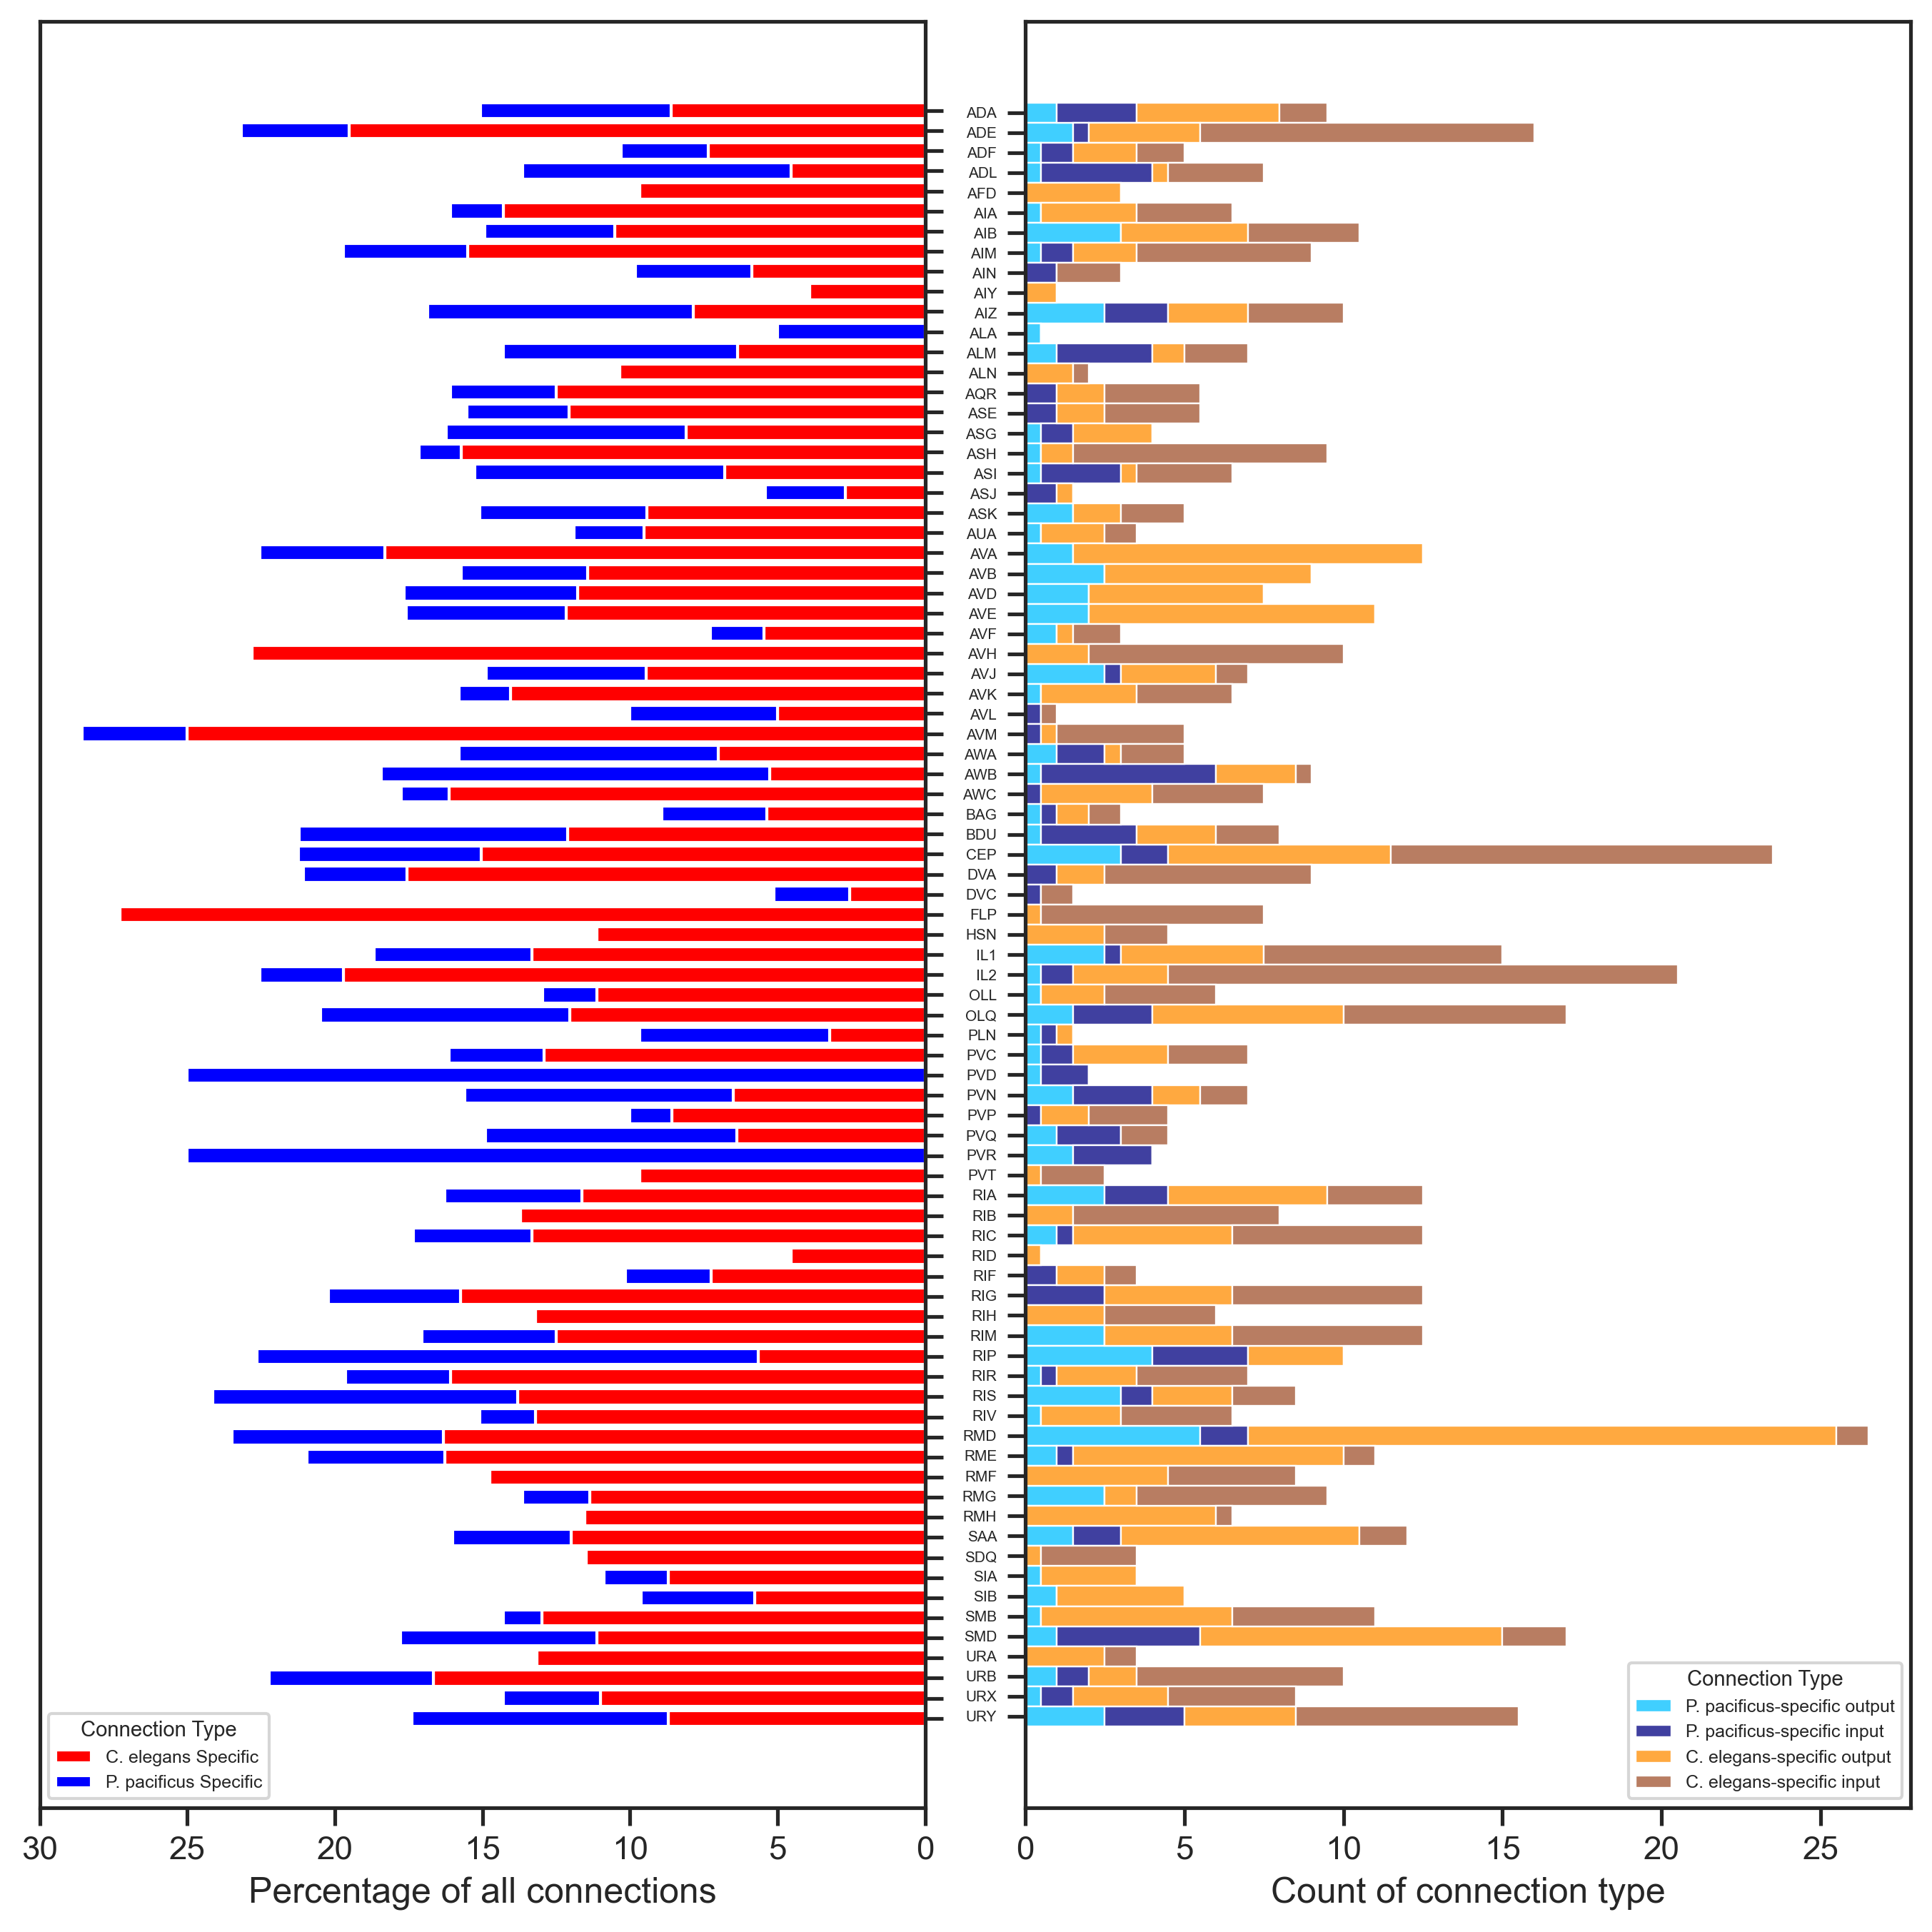

In [65]:
#Figure 3 Supplemental 2

dfn_pristi_directed = directed_df[directed_df['species_specific'] == 'pristi_specific'].reset_index(drop=True)
dfn_cel_directed = directed_df[directed_df['species_specific'] == 'cel_specific'].reset_index(drop=True)

df1_directed = pd.concat([
    process_df(dfn_pristi_directed, 'Pristi-specific output', 'Pristi-specific input'),
    process_df(dfn_cel_directed, 'Cel-specific output', 'Cel-specific input')
  ]).sort_values('neuron').reset_index(drop=True)





dfn_directed = directed_df.groupby(['pre','post','species_specific']).size().reset_index(name='count')

def remove_from_list(df, columns, removelist):
    for column in columns:
        df = df[~df[column].isin(removelist)]
    return df

columns = ['pre','post']
columns1 = ['neuron']
removelist = ['DB1', 'VB01', 'VB1', 'VB02', 'VD01', 'VC01', 'VBn']
dfn_directed = remove_from_list(dfn_directed, columns, removelist)
df1_directed = remove_from_list(df1_directed, columns1, removelist)


df_post_directed = dfn_directed[['post','species_specific', 'count']].rename(columns={"post": "neuron"})
df_pre_directed = dfn_directed[['pre','species_specific', 'count']].rename(columns={"pre": "neuron"})
df_combo_directed = [df_pre_directed, df_post_directed]

df_new_directed = pd.concat(df_combo_directed).reset_index(drop=True)
df_new_directed = df_new_directed.groupby(['neuron', 'species_specific']).size().unstack().reset_index().fillna(0)
df_new_directed['cel_specific_portion'] = (((df_new_directed['cel_specific']) / (df_new_directed['cel_specific']+ df_new_directed['pristi_specific']+ df_new_directed['not specific']+ df_new_directed['core'])))*100
df_new_directed['pristi_specific_portion'] = ((df_new_directed['pristi_specific']) / (df_new_directed['cel_specific']+ df_new_directed['pristi_specific']+ df_new_directed['not specific'] + df_new_directed['core']))*100
df_new_directed['not_specific_portion'] = ((df_new_directed['not specific'] + df_new_directed['core']) / (df_new_directed['cel_specific']+df_new_directed['pristi_specific']+df_new_directed['not specific']+ df_new_directed['core']))*100

df_new_directed = df_new_directed.loc[(df_new_directed['cel_specific'] > 0) | (df_new_directed['pristi_specific'] > 0)]


df_new_directed = df_new_directed.sort_values('neuron', ascending=False)


    # Save df1 and df_new to csv files
    #df1.to_csv(f'{output_filename}_df1.csv', index=False)
    #df_new.to_csv(f'{output_filename}_df_new.csv', index=False)



plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style= 'ticks')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 6})
fig2 = plt.figure(figsize=(9, 9))
fig2.set_dpi(300)



# Plot on ax3
ax3 = fig2.add_subplot(4,2,(1,7))

ax3.barh(df_new_directed['neuron'], df_new_directed['cel_specific_portion'], color="red")
ax3.barh(df_new_directed['neuron'], df_new_directed['pristi_specific_portion'], left=df_new_directed['cel_specific_portion'], color="blue")
#ax3.tick_params(axis='y', labelsize=10)
ax3.yaxis.tick_right()
ax3.set_yticklabels([])
ax3.legend(["C. elegans Specific","P. pacificus Specific"], title="Connection Type", loc="lower left", fontsize=6, title_fontsize=7)
ax3.invert_xaxis()

ax3.set_xlabel("Percentage of all connections")
#ax3.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
#ax3.set_ylim(max(df_new_directed['neuron']), min(df_new_directed['neuron']))



#Plot on ax4
ax4 = fig2.add_subplot(4,2,(2,8))
sns.histplot(y="neuron", hue='species', hue_order=["Cel-specific output", "Cel-specific input","Pristi-specific output", "Pristi-specific input"], multiple='stack', data=df1_directed, palette=palette2, legend=False, ax=ax4)
ax4.set_ylabel('')
ax4.yaxis.set_label_coords(-0.1, 0.5)
ax4.tick_params(axis='y', labelsize=5)
#ax4.set_xticks(range(60))
ax4.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

ax4.set_xlabel("Count of connection type")
ax4.legend(["P. pacificus-specific output", "P. pacificus-specific input","C. elegans-specific output", "C. elegans-specific input"], title='Connection Type', loc='lower right', fontsize=6, title_fontsize=7)



neurons_new_directed = df_new_directed.neuron.unique()
neurons_pre_directed = df_pre_directed.neuron.unique()
neurons_post_directed = df_post_directed.neuron.unique()

print(neurons_pre_directed)

# Print sorted list of all species dimorphic neurons
print("List of all species dimorphic neurons (directed):", sorted(neurons_new_directed), "Total:", len(neurons_new_directed))
print("Neurons in pre not in new (pre directed):", [x for x in neurons_pre_directed if x not in neurons_new_directed])
print("Neurons in pre not in new (post directed):", [x for x in neurons_post_directed if x not in neurons_new_directed])


plt.savefig("output/pristi_fig3s2.svg")
plt.savefig("output/pristi_fig3s2.png")


      Unnamed: 0  pre post  witvliet_7_syn  witvliet_8_syn  cel_n2u_syn  \
10            10  ADA  AVA             3.0             5.0         17.0   
11            11  ADA  AVB            28.0            45.0         62.0   
12            12  ADA  AVD             1.0             1.0          8.0   
13            13  ADA  AVE             4.0             1.0          4.0   
14            14  ADA  AVJ            10.0            18.0         24.0   
...          ...  ...  ...             ...             ...          ...   
1622        2034  URY  AVE            26.0            30.0         66.0   
1626        2038  URY  BAG             0.0             0.0          0.0   
1628        2040  URY  CEP             1.0             3.0          7.0   
1629        2041  URY  IL1            13.0            16.0         12.0   
1634        2047  URY  RIB            14.0            15.0         37.0   

      pristi_series14  pristi_series15  how_many_datasets_have_syn  \
10               20.0        

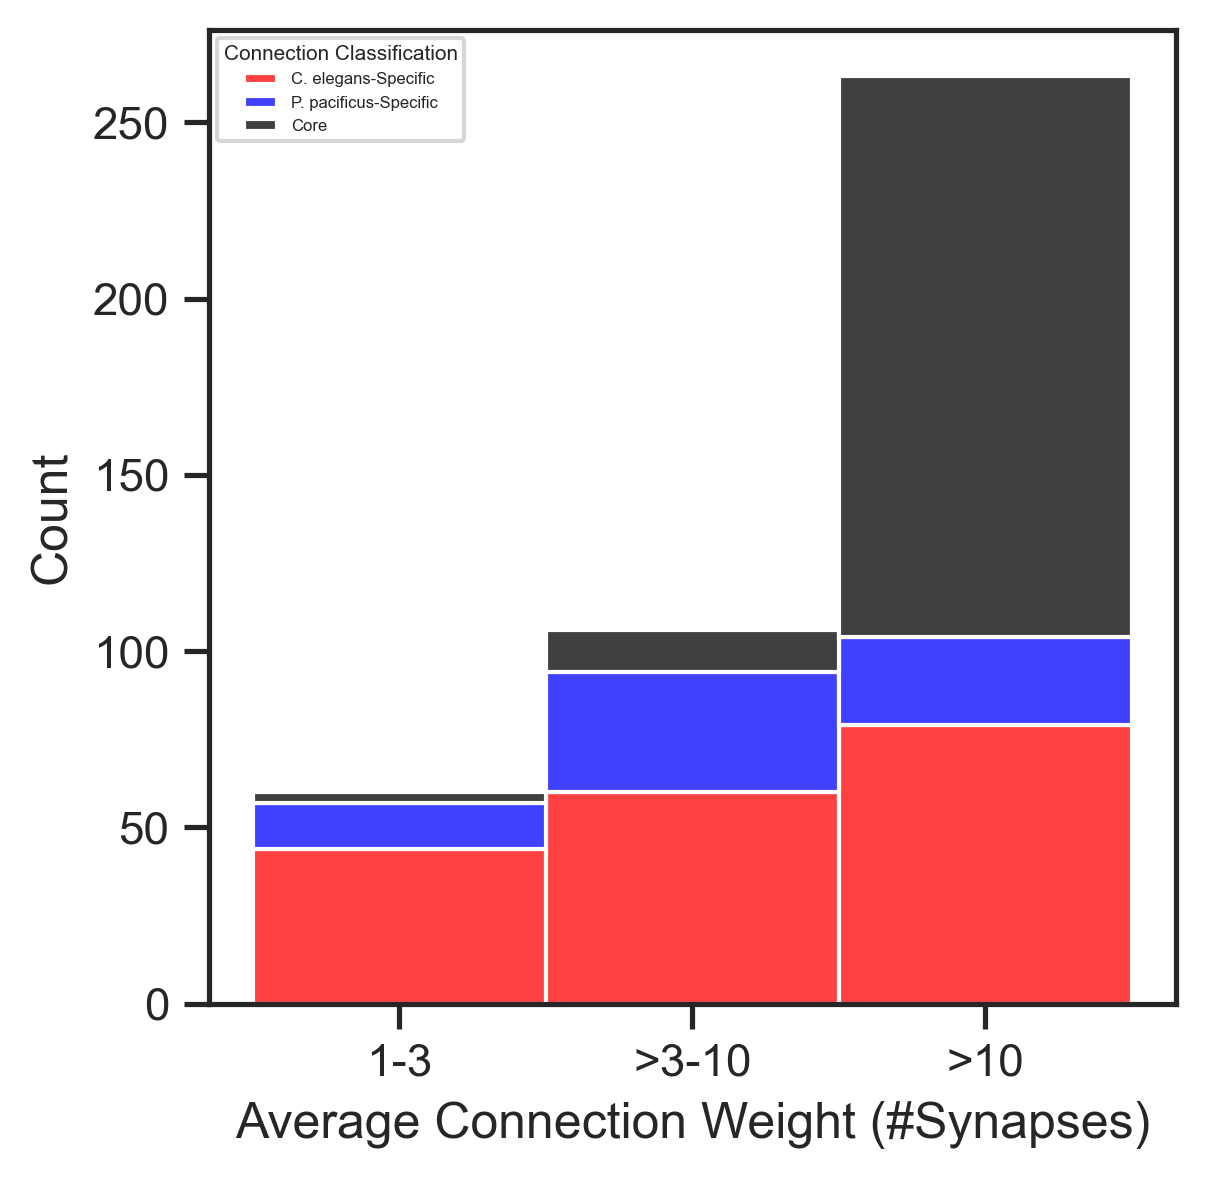

length of subset unique and total unique
64
72
The percentage of neurons in the core connectome is: 0.8888888888888888
Those not in the core connectome are: ['AVH', 'AVL', 'CAN', 'FLP', 'PVR', 'PVT', 'RID', 'SIB']
length of subset unique and total unique
49
72
The percentage of neurons in the pristi_specific connectome is: 0.6805555555555556
Those not in the pristi_specific connectome are: ['ADE', 'AIA', 'AIY', 'ALA', 'ALN', 'ASE', 'ASH', 'ASJ', 'ASK', 'AUA', 'AVH', 'AWC', 'CAN', 'DVC', 'FLP', 'IL2', 'PVT', 'RIB', 'RID', 'RIH', 'SIA', 'URA', 'URX']
length of subset unique and total unique
68
72
The percentage of neurons in the cel_specific connectome is: 0.9444444444444444
Those not in the cel_specific connectome are: ['ALA', 'ASJ', 'CAN', 'PVR']
the percentage of being either pristi or cel specific
The percentage of pristi_specific and cel_specific in the column is: 15.636363636363637%
Neurons not in pristi_specific or cel_specific are: ['ALA', 'ASJ', 'CAN']


In [66]:
#### Cytoscape Diagrams ###
# droplist_male = ['HSN', 'AVM', 'PLN', 'PVD', 'RMF', 'RMH', 'SDQ', 'AVF', 'AQR','PQR','HSNL', 'HSNR', 'EF1', 'EF2', 'EF3', 'MCMR', 'MCML', 'CEMDL','CEMDR','CEMVL','CEMVR','EFn', 'MCM', 'CEM','-', 'unk', 'BWM', 'VA01', 'VB01', 'VB02', 'VC01', 'VD01', 'SAB', 'unknownFLPR','VA', 'VB', 'Fragment1', 'Fragment2', 'Fragment3', 'Fragment4', 'excgl', 'DB', 'DA', 'excduct', 'CEPsh', 'GLR', 'PVM', 'EFn', 'MCM', 'CEM']

syn = pd.read_csv('output/directed_species_supplemental_class1.csv')






droplist = ['HSN', 'VBn', 'AVM', 'AMs', 'PLN', 'PVN', 'PVD', 'RMF', 'RMH', 'SDQ', 'AVF', 'AQR','PQR','HSNL', 'HSNR', 'EF1', 'EF2', 'EF3', 'MCMR', 'MCML', 'CEMDL','CEMDR','CEMVL','CEMVR','EFn', 'MCM', 'CEM','-', 'unk', 'BWM', 'VAn', 'VBn', 'VB02', 'VC01', 'VD01', 'SAB', 'unknownFLPR','VAn', 'VBn', 'VCn', 'VDn',  'Fragment1', 'Fragment2', 'Fragment3', 'Fragment4', 'excgl', 'DBn', 'DAn', 'excduct', 'CEPsh', 'GLR', 'PVM', 'EFn', 'MCM', 'CEM']
syn = syn[~syn.pre.isin(droplist)]
syn = syn[~syn.post.isin(droplist)].reset_index(drop=True)

#only do this for older datasets that haven't been swapped out yet!!
syn = syn.replace({'ASE': 'AWC', 'AWC': 'ASE'})
syn['cyto_id'] = syn['pre'].astype(str) + " (pp) " + syn['post'].astype(str)

# pristi_cyto = syn[(syn['pristi_sum_syn'] == 2) & ((syn['elegans_sum_syn'] == 0) | (syn['elegans_sum_syn'] == 10))].reset_index(drop=True)
# pristi_cyto.to_csv('/content/drive/MyDrive/pristi_working/pristi_code/output/pristi_cyto.csv')
# cel_cyto = syn[(syn['elegans_sum_syn'] == 10) & ((syn['pristi_sum_syn'] == 0) | (syn['pristi_sum_syn'] == 2))].reset_index(drop=True)
# cel_cyto.to_csv('/content/drive/MyDrive/pristi_working/pristi_code/output/cel_cyto.csv')
# core_cyto = syn[(syn['conserved_syn'] == 12)].reset_index(drop=True)
# core_cyto.to_csv('/content/drive/MyDrive/pristi_working/pristi_code/output/core_cyto.csv')


def cyto_bins(df):
  conditions = [((df['average_synaptic_weight'] > 0) & (df['average_synaptic_weight'] <= 3)),((df['average_synaptic_weight'] > 3) & (df['average_synaptic_weight'] <= 10)), (df['average_synaptic_weight'] > 10)]
  values = ['1-3', '>3-10', '>10']
  df['Cytoscape Bins'] = np.select(conditions, values)
  df['Cytoscape Bins'] = pd.Categorical(df['Cytoscape Bins'], ['1-3', '>3-10', '>10'])
  return df

cytoscape_binned = cyto_bins(syn)
cytoscape_binned.to_csv("output/cytoscape_binned.csv")

cytoscape_binned_no_non= cytoscape_binned[cytoscape_binned['species_specific'] != 'not specific']
cytoscape_binned_no_non.to_csv("output/cytoscape_binned_no_non.csv")


palette_cyto ={"cel_specific": "red", "pristi_specific": "blue", "core": "black", "not specific": "tab:gray"}


# pristi_cyto_bins = cyto_bins(pristi_cyto)
# cel_cyto_bins = cyto_bins(cel_cyto)
# core_cyto_bins = cyto_bins(core_cyto)

# print(pristi_cyto_bins)
# # pristi_cyto_bins.to_csv("/content/drive/MyDrive/cook_adjacency_working/male_micropub/figs/pristi_cyto_binss.csv")
# # cel_cyto_bins.to_csv("/content/drive/MyDrive/cook_adjacency_working/male_micropub/figs/cel_cyto_binss.csv")
# # core_cyto_bins.to_csv("/content/drive/MyDrive/cook_adjacency_working/male_micropub/figs/core_cyto_bins.csv")
fig3= plt.figure(figsize=(4, 4))
# fig.set_size_inches(4, 3)

fig3.set_dpi(300)
fig3ax1 = fig3.add_subplot(1,1,1)
#plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
print(cytoscape_binned_no_non)
fig3ax1 = sns.histplot(data=cytoscape_binned_no_non, x="Cytoscape Bins", hue = 'species_specific', palette = palette_cyto, multiple="stack", legend=False)
fig3ax1.legend(["C. elegans-Specific", "P. pacificus-Specific", "Core"], title='Connection Classification', loc='upper left', fontsize='4', title_fontsize='5')
fig3ax1.set_xlabel('Average Connection Weight (#Synapses)')


fig3.align_ylabels()
fig3.suptitle('')
#fig3.subplots_adjust(wspace=0.5, hspace=0.8)
fig3.tight_layout()
plt.savefig("output/cytohist_working.svg")
plt.show()


# fig2ax1 = fig2.add_subplot(3,2,1)
# palette ={"core": "tab:grey", "cel_specific": "#99000D", "pristi_specific": "#225EA8"}
# fig2ax1 = sns.histplot(data=cel_cyto_bins, x="Cytoscape Bins", hue = 'specific_syn', palette = palette, multiple="stack", legend=False)
# _, xlabels = plt.xticks()
# fig2ax1.set_xlabel('Average Connection Weight')
# fig2ax1.set_xticklabels(xlabels, size=8)
# # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# fig2ax1.legend(bbox_to_anchor=(1.02, 1), labels = ['C. elegans-Specific','Core'], title='Connection Type', fontsize='8', loc = 'upper left', borderaxespad=0, title_fontsize='10')
# # fig2ax1.set_xticklabels(fig2ax1.get_xticks(), size = 6)
# fig2ax2 = fig2.add_subplot(3,2,2)
# fig2ax2 = sns.histplot(data=pristi_cyto_bins, x="Cytoscape Bins", hue = 'specific_syn', palette = palette, multiple="stack", legend=False)
# _, xlabels = plt.xticks()
# fig2ax2.set_xticklabels(xlabels, size=8)
# # fig2ax2.set_title(r'$d_n$')
# fig2ax2.set_xlabel('Average Connection Weight')
# fig2ax2.legend(bbox_to_anchor=(1.02, 1), labels = [ 'P. pacificus-Specific','Core'], title='Connection Type', fontsize='8', loc = 'upper left', borderaxespad=0, title_fontsize='10')
# # sns.move_legend(fig2ax2, "upper left")
# # fig2ax2.set_xticklabels(fig2ax2.get_xticks(), size = 6)
# fig2ax3 = fig2.add_subplot(3,2,3)
# fig2ax3 = sns.histplot(data=core_cyto_bins, x="Cytoscape Bins", color = 'tab:grey')
# #_, xlabels = plt.xticks()
# #fig2ax3.set_xticklabels(xlabels, size=8)
# fig2ax3.set_xlabel('Average Connection Weight')
# fig2ax3.set_xtick('1-3', '>3-10', '>10')

# max_ylim = max(fig2ax1.get_ylim()[1], fig2ax2.get_ylim()[1], fig2ax3.get_ylim()[1])

# fig2ax1.set_ylim(0, max_ylim)
# fig2ax2.set_ylim(0, max_ylim)
# fig2ax3.set_ylim(0, max_ylim)








def calculate_percentage_and_missing(cytoscape_binned, condition, compare_against):
    subset = cytoscape_binned[cytoscape_binned['species_specific'] == condition]

    if compare_against == 'pristi_specific':
        total = cytoscape_binned[cytoscape_binned['species_specific'] == 'pristi_specific']['pre'].unique().tolist() + cytoscape_binned[cytoscape_binned['species_specific'] == 'pristi_specific']['post'].unique().tolist()
    elif compare_against == 'cel_specific':
        total = cytoscape_binned[cytoscape_binned['species_specific'] == 'cel_specific']['pre'].unique().tolist() + cytoscape_binned[cytoscape_binned['species_specific'] == 'cel_specific']['post'].unique().tolist()
    else:
        total = cytoscape_binned['pre'].unique().tolist() + cytoscape_binned['post'].unique().tolist()

    total_unique = list(set(total))
    subset_list = subset['pre'].unique().tolist() + subset['post'].unique().tolist()
    subset_unique = list(set(subset_list))

    subset_percentage = len(subset_unique) / len(total_unique)
    print("length of subset unique and total unique")
    print(len(subset_unique))
    print(len(total_unique))
    print("The percentage of neurons in the", condition, "connectome is:", subset_percentage)

    not_in_subset = [item for item in total_unique if item not in subset_unique]
    print("Those not in the", condition, "connectome are:", sorted(not_in_subset))


calculate_percentage_and_missing(cytoscape_binned, 'core', 'total')
#calculate_percentage_and_missing(cytoscape_binned, 'pristi_specific', 'cel_specific')
calculate_percentage_and_missing(cytoscape_binned, 'pristi_specific', 'core')
calculate_percentage_and_missing(cytoscape_binned, 'cel_specific', 'core')


def calculate_specific_percentage(cytoscape_binned):
    specific = cytoscape_binned[(cytoscape_binned['species_specific'] == 'pristi_specific') | (cytoscape_binned['species_specific'] == 'cel_specific')]
    specific_percentage = len(specific) / len(cytoscape_binned['species_specific'])
    print(f"The percentage of pristi_specific and cel_specific in the column is: {specific_percentage * 100}%")

# Calculate percentage for 'pristi_specific' and 'cel_specific'
print("the percentage of being either pristi or cel specific")
calculate_specific_percentage(cytoscape_binned)

def calculate_missing_neurons(cytoscape_binned):
    pristi_specific = cytoscape_binned[cytoscape_binned['species_specific'] == 'pristi_specific']
    cel_specific = cytoscape_binned[cytoscape_binned['species_specific'] == 'cel_specific']

    pristi_specific_list = pristi_specific['pre'].unique().tolist() + pristi_specific['post'].unique().tolist()
    cel_specific_list = cel_specific['pre'].unique().tolist() + cel_specific['post'].unique().tolist()

    total = cytoscape_binned['pre'].unique().tolist() + cytoscape_binned['post'].unique().tolist()
    total_unique = list(set(total))

    not_in_specific = [item for item in total_unique if item not in pristi_specific_list and item not in cel_specific_list]
    print("Neurons not in pristi_specific or cel_specific are:", sorted(not_in_specific))

# Usage:
calculate_missing_neurons(cytoscape_binned)






In [67]:
pristisyn = contactdf[contactdf['specific_syn']=='pristi_specific'].copy()
print('Pristi-specific synapses Tukey comparsion here')
comp = mc.MultiComparison(pristisyn['ave_scaled_adj'], pristisyn['Species Adjacency'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

Pristi-specific synapses Tukey comparsion here
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1      group2    meandiff p-adj lower upper  reject
----------------------------------------------------------
C. elegans P. pacificus   0.3971   0.0 0.293 0.5011   True
----------------------------------------------------------


In [68]:
celsyn = contactdf[contactdf['specific_syn']=='cel_specific'].copy()
print('Cel-specific synapses Tukey comparsion here')
comp = mc.MultiComparison(celsyn['ave_scaled_adj'], celsyn['Species Adjacency'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

Cel-specific synapses Tukey comparsion here
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
C. elegans P. pacificus  -0.8047 0.0002 -1.1809 -0.4286   True
--------------------------------------------------------------


In [69]:
coresyn = contactdf[contactdf['specific_syn']=='core'].copy()
print('Core synapses Tukey comparsion here')
comp = mc.MultiComparison(coresyn['ave_scaled_adj'], coresyn['Species Adjacency'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

Core synapses Tukey comparsion here
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2    meandiff p-adj  lower  upper  reject
------------------------------------------------------------
C. elegans P. pacificus  -0.1571   0.0 -0.1932 -0.121   True
------------------------------------------------------------


In [70]:
notsyn = contactdf[contactdf['specific_syn']=='not specific'].copy()
print('Not specific synapses Tukey comparsion here')
comp = mc.MultiComparison(notsyn['ave_scaled_adj'], notsyn['Species Adjacency'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

Not specific synapses Tukey comparsion here
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2    meandiff p-adj  lower  upper  reject
------------------------------------------------------------
C. elegans P. pacificus  -0.2184   0.0 -0.2598 -0.177   True
------------------------------------------------------------


In [71]:
#ML PREPROCESSING

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

###Cross validating the classifiers
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE, SMOTENC
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import svm
from matplotlib import pyplot as plt
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

def brittin_layers(n):
  #requires passing nclass first
  if n in ('CEP', 'URY', 'URA', 'URA', 'RME', 'RIP', 'OLQ', 'IL2', 'IL1',
           'URY', 'IL1', 'RMDD', 'RMDV', 'OLL', 'RIH', 'AVE', 'RIA'
  ):
    return 'Anterior'
  if n in ('FLP', 'ADA', 'ASH', 'RIF', 'PVP', 'PVC', 'BDU', 'AVM', 'AVJ', 'AVH', 'AVD', 'AVB', 'ALM', 'AQR'
  ):
    return 'Avoidance'
  if n in ('DVC', 'RIG', 'RIS', 'SMD', 'RIV', 'SAA', 'PVT', 'AVK', 'AVL', 'RMF', 'RIM'
  ):
    return 'Lateral'
  if n in ('RMG', 'URB', 'DVA', 'SMB', 'SIA', 'SIBV', 'RIC', 'SDQ', 'RMH'
  ):
    return 'Sublateral'
  if n in ('BAG', 'RIB', 'ASI', 'AWC', 'AIN', 'AUA', 'AFD', 'AIY', 'ADL', 'AWB', 'ASE', 'AWA', 'ADF', 'AIZ', 'AIB', 'AIA', 'ASG', 'ASK', 'AVF', 'PVQ', 'ASJ', 'AIM', 'ALA'
  ):
    return 'Taxis'
  if n in ('RMD', 'URX', 'ALN', 'ADE', 'AVA', 'RIR', 'RID', 'HSN', 'PVR', 'PVN', 'PLN'
  ):
    return 'Unclassified'
  else:
    return 'non-ganglia'


def ganglia_check(i,j):
  if (i == 'non-ganglia') | (j == 'non-ganglia'):
     return 'non-ganglia'
  if i == j:
    return 'same'
  else:
    return 'different'

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style= 'ticks')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 6})



# Assuming merged is your DataFrame and it has the columns specified in adjcols

# Define a function to take log10
def take_log10(x,y):
  for i in y:
    x[i + '-S-log10'] = np.log10(x[i] + 1).astype('float64')
  return x

def synapse_recode(X):
  if X > 0:
    return 1
  else:
    return 0

merged2.drop_duplicates(inplace=True)
merged2 = pd.read_csv('output/adj_syn_merged_sjc.csv')

adjcols = ['witvliet_1', 'witvliet_2', 'witvliet_3', 'witvliet_4', 'witvliet_5', 'witvliet_6', 'cel_jsh', 'witvliet_8', 'cel_n2u', 'pristi_s14', 'pristi_s15']
syncols = ['witvliet_1_syn', 'witvliet_2_syn', 'witvliet_3_syn', 'witvliet_4_syn', 'witvliet_5_syn', 'witvliet_6_syn', 'cel_jsh_syn', 'witvliet_8_syn', 'cel_n2u_syn']
cel_cols = ['witvliet_1-S-log10', 'witvliet_2-S-log10', 'witvliet_3-S-log10','witvliet_4-S-log10', 'witvliet_5-S-log10', 'witvliet_6-S-log10', 'cel_jsh-S-log10', 'witvliet_8-S-log10', 'cel_n2u-S-log10']
pristi_cols = ['pristi_s14-S-log10', 'pristi_s15-S-log10']
pristi_syn_cols = ['pristi_s14_syn', 'pristi_s15_syn']
new_cols2 = [x + '-S-log10' for x in adjcols]


# Apply the function to the DataFrame
take_log10(merged2, adjcols)

# Scale the columns
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))
merged2[new_cols2] = scaler.fit_transform(merged2[new_cols2])

# Compute the mean scaled adjacency
merged2['ave_scaled_adj_cel'] = merged2[cel_cols].mean(axis=1)
merged2['ave_scaled_adj_pristi'] = merged2[pristi_cols].mean(axis=1)

# Compute the mean of the synapse columns
merged2['ave_syn_cel'] = merged2[syncols].mean(axis=1)
merged2['ave_syn_pristi'] = merged2[pristi_syn_cols].mean(axis=1)

#apply synapse recode
merged2['ave_syn_cel_recode'] = merged2['ave_syn_cel'].apply(synapse_recode)
merged2['ave_syn_pristi_recode'] = merged2['ave_syn_pristi'].apply(synapse_recode)



merged2['pre_brittin'] = merged2['pre'].apply(brittin_layers)
merged2['post_brittin'] = merged2['post'].apply(brittin_layers)

merged2['ganglia_check_result'] = merged2.apply(lambda row: ganglia_check(row['pre_brittin'], row['post_brittin']), axis=1)
merged2 = merged2[merged2['ganglia_check_result'] != 'non-ganglia']
#merged2 = merged2[merged2['specific_adj'] != 'cel_specific']
merged2.drop_duplicates()




# Encode 'ganglia_check_result' as integers
encoder = LabelEncoder()
merged2['ganglia_check_result_encoded'] = encoder.fit_transform(merged2['ganglia_check_result'])
merged2['specific_adj_encoded'] = encoder.fit_transform(merged2['specific_adj'])
merged2.loc[(merged2['ave_syn_pristi_recode'] > 0) & (merged2['ave_scaled_adj_pristi'] == -1), 'ave_scaled_adj_pristi'] = -0.5
merged2.to_csv("output/merged2_sjc.csv")


# Add 'ganglia_check_result_encoded' to your feature matrix
X_train = merged2[['ave_scaled_adj_cel', 'ganglia_check_result_encoded']]
X_test = merged2[['ave_scaled_adj_pristi', 'ganglia_check_result_encoded']]
Y_test = merged2['ave_syn_pristi_recode']
#Y.fillna(0, inplace=True)
Y_train = merged2['ave_syn_cel_recode']
Y_train.fillna(0, inplace=True)
Y_test.fillna(0, inplace=True)
Y_train.astype('int')
Y_test.astype('int')

categorical_features = [False, True]

smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, Y_train)


# Initialize SMOTENC

# Convert DataFrames to numpy arrays
X_train_np = X_train_smote.values
Y_train_np = y_train_smote.values
X_test_np = X_test.values
Y_test_np = Y_test.values


# The rest of your code...



mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=900,activation = 'logistic',solver='adam')
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', verbose=0, random_state = np.random.RandomState(69), max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10)
# #x = XGBClassifier(eval_metric="auc", scale_pos_weight=25, early_stopping_rounds=15, enable_categorical=True, max_depth=9, min_child_weight=6, n_jobs = 8, n_estimators = 600, tree_method='exact', eta=0.5, verbosity = 0, learning_rate=0.0005, gamma=1.25, objective='reg:logistic', booster='dart')
clf = DecisionTreeClassifier(max_depth =5, random_state = 42, min_samples_leaf=5)
logreg = LogisticRegression(penalty='l2', solver='newton-cholesky', C=0.001)

# Add the XGBoost classifier to the classifiers list
classifiers = [mlp, rf, clf, logreg]
logreg_final = LogisticRegression(penalty=None, solver='newton-cg', C=0.001)
#logreg_final = RandomForestClassifier(n_estimators = 100, criterion='gini', verbose=0, random_state = np.random.RandomState(1), max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10)

#logreg_final = MLPClassifier(hidden_layer_sizes=(10, 50, 10), activation='relu', solver='adam', alpha=0.005, learning_rate='adaptive')


# Ensure the names list matches the classifiers list
names = ['Multi-layer Perceptron', 'Random Forest', 'Decision Tree', 'Logistic Regression']

# The rest of your code remains the same
# Fit the model to your data
logreg_final.fit(X_train_np, Y_train_np)
log_predictions = logreg_final.predict(X_test_np)
print(metrics.classification_report(Y_test,log_predictions))



y_pred_proba = logreg_final.predict_proba(X_test_np)[::,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test_np, y_pred_proba)
precision, recall, threshold = metrics.precision_recall_curve(Y_test, y_pred_proba)
auc_ROC = str(metrics.roc_auc_score(Y_test_np, y_pred_proba))[:5]
auc_precision_recall = str(metrics.auc(recall, precision))[:5]
print("ROC-AUC is", auc_ROC)
print("PR-AUC is", auc_precision_recall)

i=0
scores = {}


for j in classifiers:
    try:
        pip = make_pipeline(smote_nc, j)
        cv = StratifiedKFold(n_splits=10)
        metrics = cross_validate(pip, X_train_smote, y_train_smote, scoring=('average_precision','roc_auc','f1'), cv=cv, return_train_score=True)
        roc = metrics['test_roc_auc']
        avg_precision = metrics['test_average_precision']
        f1 = metrics['test_f1']
        scores[names[i]] = [np.mean(roc), np.mean(avg_precision), np.mean(f1)]
        i += 1

    except Exception as e:
        print(f"An error occurred with classifier {names[i]}: {e}")



scoresdf = pd.DataFrame.from_dict(scores)
scoresdf = scoresdf.set_index(pd.Index(['Area Under The ROC Curve', 'Area Under The Precision Recall Curve','F1 Score'], name='Metric'))
scoresdf = scoresdf.round(4)
scoresdf = scoresdf.reset_index()

print(scoresdf)



/opt/anaconda3/envs/pristi/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1441
           1       0.78      0.85      0.81       902

    accuracy                           0.85      2343
   macro avg       0.84      0.85      0.84      2343
weighted avg       0.85      0.85      0.85      2343

ROC-AUC is 0.927
PR-AUC is 0.882
                                  Metric  Multi-layer Perceptron  \
0               Area Under The ROC Curve                  0.8706   
1  Area Under The Precision Recall Curve                  0.8772   
2                               F1 Score                  0.7744   

   Random Forest  Decision Tree  Logistic Regression  
0         0.8558         0.8529               0.8647  
1         0.8497         0.8348               0.8674  
2         0.7743         0.7387               0.7831  


In [72]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# fig, ax = plt.subplots()

# # Hide axes
# ax.axis('tight')
# ax.axis('off')

# # Add table
# table = ax.table(cellText=scoresdf.values, colLabels=scoresdf.columns, loc='center')

# # Auto size the columns
# table.auto_set_column_width(list(range(len(scoresdf.columns))))

# plt.show()

#GRIDSEARCH, LEGACY AND NO NEED TO RUN

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import roc_auc_score
# from sklearn.neural_network import MLPClassifier

# # Define the parameter grid
# param_grid = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (10,50,10), (10,10,10)],
#     'activation': ['relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.01, 0.005],
#     'learning_rate': ['constant','adaptive'],
# }

# # Create a MLPClassifier object
# mlp = MLPClassifier(max_iter=200)

# # Create a GridSearchCV object
# scoring = make_scorer(roc_auc_score, needs_proba=True)
# clf = GridSearchCV(mlp, param_grid, cv=5, scoring=scoring)


# # Fit the GridSearchCV object to the data
# clf.fit(X_train_np, Y_train_np)

# # Print the best parameters
# print(clf.best_params_)

Fig A: pearsons r = 0.7514913225936386
Fig A: p-value = 1.2024971136303875e-110
Index(['Metric', 'Multi-layer Perceptron', 'Random Forest', 'Decision Tree',
       'Logistic Regression'],
      dtype='object')


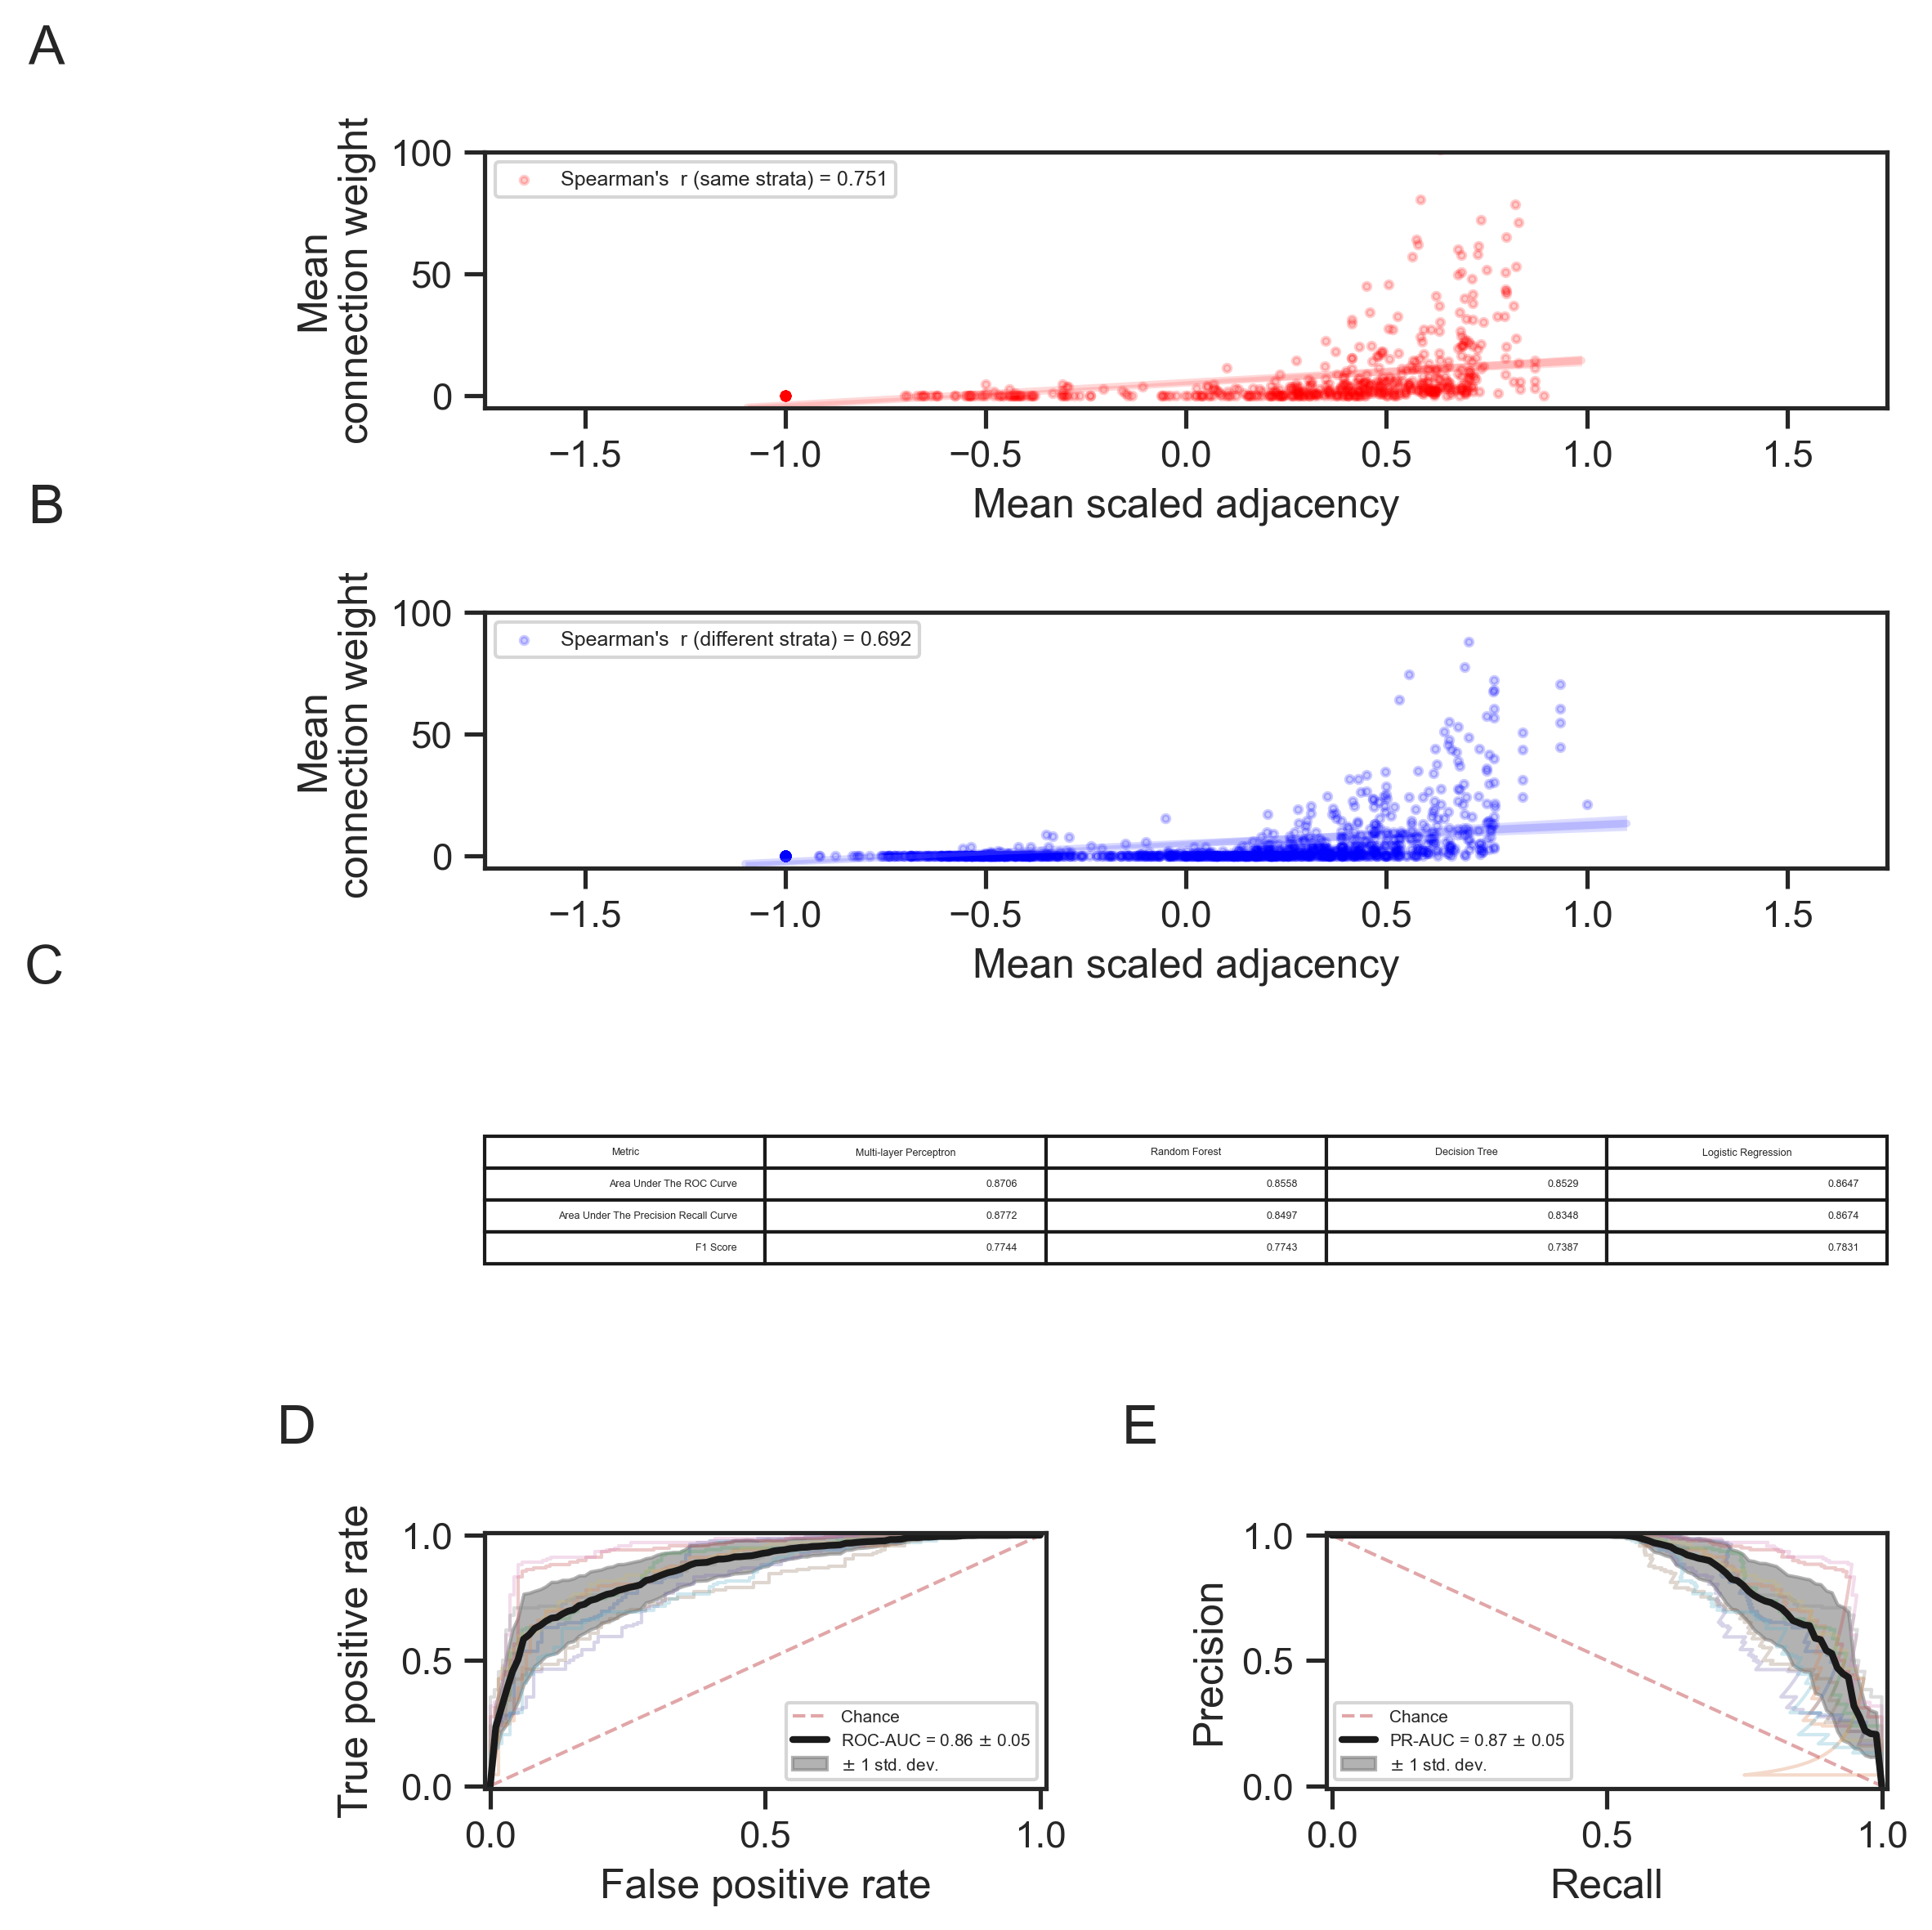

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve


# Create the scatter plot for 'ave_syn_pristi_recode'
#sns.scatterplot(data=merged2, x='ave_scaled_adj_cel', y='ave_scaled_adj_pristi', hue='ave_syn_pristi_recode', palette='cool')

# Create the scatter plot for 'ave_syn_cel_recode'
# sns.scatterplot(data=merged2, x='ave_scaled_adj_cel', y='ave_scaled_adj_pristi', hue='ave_syn_cel_recode', palette='hot')
# # Display the plot
# plt.show()
#print(merged2)

fig2 = plt.figure(figsize=(8, 8))
fig2.set_dpi(300)
plt.rcParams["font.family"] = "sans-serif"


fig2ax1 = fig2.add_subplot(4,2,(1,2))
df_same = merged2[(merged2['ganglia_check_result'] == 'same')]
df_notsame = merged2[(merged2['ganglia_check_result'] == 'different')]
#correlation calculations for fig2ax1
corr1,corr1a = stats.spearmanr(df_same['ave_scaled_adj_pristi'], df_same['ave_syn_pristi'])
corr1different,corr1adifferent = stats.spearmanr(df_notsame['ave_scaled_adj_pristi'], df_notsame['ave_syn_pristi'])
sns.regplot(ax=fig2ax1, x=df_same.ave_scaled_adj_pristi, y=df_same.ave_syn_pristi, truncate=False, color='red', line_kws={"color": "red", 'alpha':0.15}, scatter_kws={'alpha':0.2, 's':5})
#sns.rugplot(ax=fig2ax1, x=df_same.ave_scaled_adjacency, y=df_same.new_ave_synapse,  color='red', lw=5, alpha=.05, height=-.03, clip_on=False)
fig2ax1.set_xlabel('Mean scaled adjacency')
fig2ax1.set_ylabel('Mean\nconnection weight')
fig2ax1.legend(labels=["Spearman's  r (same strata) = "+ str(corr1)[:5]], fontsize=6, loc='upper left')
fig2ax1.set_ylim([-5, 100])
fig2ax1.set_xlim([-1.75, 1.75])
fig2ax1.text(-.3, 1.5, 'A', transform=fig2ax1.transAxes, fontsize=16, va='top', ha='right')
print('Fig A: pearsons r = ' + str(corr1))
print('Fig A: p-value = ' + str(corr1a))



fig2ax2 = fig2.add_subplot(4,2,(3,4))
sns.regplot(ax=fig2ax2, x=df_notsame.ave_scaled_adj_pristi, y=df_notsame.ave_syn_pristi, truncate=False, color='blue', line_kws={"color": "blue", 'alpha':0.15}, scatter_kws={'alpha':0.2, 's':5})
#sns.rugplot(ax=fig2ax1, x=df_notsame.ave_scaled_adjacency, y=df_notsame.new_ave_synapse,  color='blue', lw=5, alpha=.05, height=-.03, clip_on=False)
fig2ax2.set_xlabel('Mean scaled adjacency')
fig2ax2.set_ylabel('Mean\n connection weight')
fig2ax2.legend(labels=["Spearman's  r (different strata) = "+ str(corr1different)[:5]], fontsize=6, loc='upper left')
fig2ax2.set_ylim([-5, 100])
fig2ax2.set_xlim([-1.75, 1.75])
fig2ax2.text(-.3, 1.5, 'B', transform=fig2ax2.transAxes, fontsize=16, va='top', ha='right')

fig2axtable = fig2.add_subplot(4,2,(5,6))
print(scoresdf.columns)
fig2axtable.table(cellText=scoresdf.values, colLabels=scoresdf.columns, loc='center')
fig2axtable.text(-.3, 1.5, 'C', transform=fig2axtable.transAxes, fontsize=16, va='top', ha='right')
fig2axtable.axis('off')



# Auto size the columns

fig2ax3 = fig2.add_subplot(4,2,7)
fig2ax4 = fig2.add_subplot(4,2,8)

cv = StratifiedKFold(n_splits=10)
#classifier =  MLPClassifier(hidden_layer_sizes=(100, 50, 10), activation='relu', solver='adam', alpha=0.05, learning_rate='adaptive', early_stopping=True)
#classifier = LogisticRegression(penalty='l2', solver='newton-cg', C=0.00001)
classifier = LogisticRegression(penalty='l2', solver='newton-cg', C=0.001)
#classifier = RandomForestClassifier(n_estimators = 100, criterion='gini', verbose=0, random_state = np.random.RandomState(69), max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10)

X_train_res = X_train_np
y_train_res = Y_train_np
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
recalls = []
praucs = []
mean_precision = np.linspace(0, 1, 100)
i = 0
for train, test in cv.split(X_train_res, y_train_res):
    categorical_features = [False, True]
    smote_nc = SMOTENC(categorical_features=categorical_features, random_state=1)
    X_train_res, y_train_res = smote_nc.fit_resample(X_train_res, y_train_res)
    probas_ = classifier.fit(X_train_res[train], y_train_res[train]).predict_proba(X_train_res[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    fig2ax3.plot(fpr, tpr, lw=1, alpha=0.3) #,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    # Compute PR curve and area the curve
    precision, recall, thresholds = precision_recall_curve(y_train_res[test], probas_[:, 1])
    recalls.append(np.interp(mean_fpr, precision, recall))
    recalls[-1][0] = 1.0
    pr_auc = auc(recall, precision)
    praucs.append(pr_auc)
    fig2ax4.plot(precision, recall, lw=1, alpha=0.3) #label='PR fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

fig2ax3.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', label='Chance', alpha=.5)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
fig2ax3.plot(mean_fpr, mean_tpr, color='k', label=r'ROC-AUC = %0.2f $\pm$ %0.2f' % (mean_auc, std_auc), lw=2, alpha=1.0)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
fig2ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.6, label=r'$\pm$ 1 std. dev.')
fig2ax3.set_xlim([-0.01, 1.01])
fig2ax3.set_ylim([-0.01, 1.01])
fig2ax3.set_yticks([0,0.50,1.0])
fig2ax3.set_xticks([0,0.50,1.0])
fig2ax3.set_xlabel('False positive rate')
fig2ax3.set_ylabel('True positive rate')
fig2ax3.legend(loc="lower right", prop={'size': 5})
fig2ax3.text(-.3, 1.5, 'D', transform=fig2ax3.transAxes, fontsize=16, va='top', ha='right')


fig2ax4.plot([0, 1], [1, 0], linestyle='--', lw=1, color='r', label='Chance', alpha=.5)
mean_recall = np.mean(recalls, axis=0)
mean_recall[-1] = 0
mean_prauc = auc(mean_precision, mean_recall)
std_prauc = np.std(praucs)
fig2ax4.plot(mean_precision, mean_recall, color='k', label=r'PR-AUC = %0.2f $\pm$ %0.2f' % (mean_prauc, std_prauc), lw=2, alpha=1.0)
std_recall = np.std(recalls, axis=0)
recalls_upper = np.minimum(mean_recall + std_recall, 1)
recalls_lower = np.maximum(mean_recall - std_recall, 0)
fig2ax4.fill_between(mean_precision, recalls_lower, recalls_upper, color='grey', alpha=.6, label=r'$\pm$ 1 std. dev.')
fig2ax4.set_xlim([-0.01, 1.01])
fig2ax4.set_ylim([-0.01, 1.01])
fig2ax4.set_yticks([0,0.50,1.0])
fig2ax4.set_xticks([0,0.50,1.0])
fig2ax4.set_xlabel('Recall')
fig2ax4.set_ylabel('Precision')
fig2ax4.legend(loc="lower left", prop={'size': 5})
fig2ax4.text(-.3, 1.5, 'E', transform=fig2ax4.transAxes,fontsize=16, va='top', ha='right')


# fig2ax5 = fig2.add_subplot(4,2,7)
# fig2ax5.plot(fpr,tpr,label="ROC-AUC="+str(auc_ROC), color='k')
# fig2ax5.set_xlabel('False positive rate')
# fig2ax5.set_ylabel('True positive rate')
# fig2ax5.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', label='Chance', alpha=.5)
# fig2ax5.legend(loc=4, prop={'size': 6})
# fig2ax5.set_xlim([-0.01, 1.01])
# fig2ax5.set_ylim([-0.01, 1.01])
# fig2ax5.set_xticks([0,0.50,1.0])
# fig2ax5.text(-.3, 1.5, 'F', transform=fig2ax5.transAxes,fontsize=16, va='top', ha='right')


# fig2ax6 = fig2.add_subplot(4,2,8)
# fig2ax6.plot(precision,recall,label="PR-AUC="+str(auc_precision_recall), color='k')
# fig2ax6.set_xlabel('Recall')
# fig2ax6.set_ylabel('Precision')
# fig2ax6.plot([0, 1], [1, 0], linestyle='--', lw=1, color='r', label='Chance', alpha=.5)
# fig2ax6.legend(loc=3, prop={'size': 6})
# fig2ax6.set_xlim([-0.01, 1.01])
# fig2ax6.set_ylim([-0.01, 1.01])
# fig2ax6.set_yticks([0,0.50,1.0])
# fig2ax6.set_xticks([0,0.50,1.0])
# fig2ax6.text(-.3, 1.5, 'G', transform=fig2ax6.transAxes,fontsize=16, va='top', ha='right')


fig2.align_ylabels()
fig2.tight_layout()
fig2.subplots_adjust(wspace=0.5, hspace=0.8)
plt.savefig("manuscript_sup_ML.svg")
plt.savefig("manuscript_sup_ML.png")
#not plotted due to slight illustrator alignment changes
plt.show()



